<a href="https://colab.research.google.com/github/hinimdoumorsia/projet_Series_chronologiques/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyse exploratoire des donn√©es**

**importation des librairies necessaires**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Feature engenering**

**chargement du jeu de donn√©e**



In [4]:
data = pd.read_csv('/content/drive/MyDrive/timeSerie/bitcoin_full_dataset.csv')
data["Date"] = pd.to_datetime(data["Date"])
data.head()

Date        Close         High          Low         Open      Volume  \
0 2019-03-15  3960.911133  3968.542969  3914.015381  3926.663330  9394210605   
1 2019-03-16  4048.725830  4077.036377  3961.657471  3963.900146  9856166973   
2 2019-03-17  4025.229004  4054.122070  4006.411133  4047.719482  8221625400   
3 2019-03-18  4032.507324  4071.556641  4009.117188  4029.968506  9646954186   
4 2019-03-19  4071.190186  4082.216064  4023.812500  4032.691895  9344919956   

   fear_greed  TxTfrCnt   TxCnt  AdrActCnt  
0        55.0  693632.0  296890     715166  
1        54.0  577534.0  257699     602121  
2        58.0  516619.0  229399     548345  
3        56.0  681426.0  295707     720573  
4        56.0  683603.0  299996     739893

La **volatilit√©** repr√©sente l‚Äôampleur des fluctuations de prix d‚Äôun actif sur une p√©riode donn√©e.

**Cible secondaire** : On pourrez aussi pr√©dire la volatilit√© future (utile pour les options ou le risque.Les traders se basent sur cette m√©trique pour ajuster leurs strat√©gies).

In [ ]:
data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100

Le **RSI** est un oscillateur de momentum qui mesure la vitesse et l‚Äôampleur des variations de prix sur une p√©riode donn√©e (g√©n√©ralement 14 jours).
Le RSI n‚Äôest pas simplement une transformation lin√©aire des prix, il capture le **momentum** du march√©, ce qui peut √™tre une information compl√©mentaire pr√©cieuse.

**-->**Si RSI > 70 ‚Üí Bitcoin est en zone de surachat ‚Üí Risque de diminution du prix(Ce qui incite les traders √† vendre).

**-->**Si RSI < 30 ‚Üí Bitcoin est en zone de survente ‚Üí Potentiel rebond haussier(signalant une opportunit√© d'achat potentiel)

**Exemple** :

**~**Si on entra√Æne un mod√®le avec seulement Close, High, Low, Open, il ne comprend que la structure des prix.

**~**Avec RSI comme feature, le mod√®le a une mesure directe de la dynamique du march√©.

In [ ]:
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data

Date         Close          High           Low          Open  \
0    2019-03-15   3960.911133   3968.542969   3914.015381   3926.663330   
1    2019-03-16   4048.725830   4077.036377   3961.657471   3963.900146   
2    2019-03-17   4025.229004   4054.122070   4006.411133   4047.719482   
3    2019-03-18   4032.507324   4071.556641   4009.117188   4029.968506   
4    2019-03-19   4071.190186   4082.216064   4023.812500   4032.691895   
...         ...           ...           ...           ...           ...   
2188 2025-03-11  82862.210938  83577.757812  76624.250000  78523.875000   
2189 2025-03-12  83722.359375  84358.578125  80635.250000  82857.375000   
2190 2025-03-13  81066.703125  84301.695312  79931.851562  83724.921875   
2191 2025-03-14  83969.101562  85263.289062  80797.562500  81066.992188   
2192 2025-03-15  84300.000000  84647.273438  83708.976562  83989.804688   

           Volume  fear_greed  Volatility        RSI  
0      9394210605        55.0    1.393137        NaN  
1      9856166973        54.0    2.912390        NaN  
2      8221625400        58.0    1.190865        NaN  
3      9646954186        56.0    1.557436        NaN  
4      9344919956        56.0    1.451448        NaN  
...           ...         ...         ...        ...  
2188  54702837196        24.0    9.074814  43.342484  
2189  40353484454        34.0    4.617494  49.230449  
2190  31412940153        45.0    5.466962  45.758951  
2191  29588112414        27.0    5.527056  49.555716  
2192  13801613312        46.0    1.120904  48.037619  

[2193 rows x 9 columns]

Pour calculer la premi√®re valeur du RSI, il faut 14 valeurs de gains et pertes(14 premiers jours).

 Donc, pour les 13 premi√®res lignes, la moyenne mobile ne peut pas √™tre calcul√©e, et elles restent NaN.

# **Colonne**--------**Description**

**Date**	: Date de l'enregistrement des donn√©es (format YYYY-MM-DD).

**Close** : Prix de cl√¥ture du Bitcoin √† cette date.

**High** : Prix le plus haut atteint par le Bitcoin durant cette journ√©e.

**Low** :	Prix le plus bas atteint par le Bitcoin durant cette journ√©e.

**Open** : Prix d'ouverture du Bitcoin √† cette date.

**Volume**	: Volume total de Bitcoin √©chang√© durant cette journ√©e.

**fear_greed** :	Indice de sentiment du march√© bas√© sur la peur et la cupidit√©.

In [ ]:
print(data.isnull().sum())

Date           0
Close          0
High           0
Low            0
Open           0
Volume         0
fear_greed     1
Volatility     0
RSI           13
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2193 non-null   datetime64[ns]
 1   Close       2193 non-null   float64       
 2   High        2193 non-null   float64       
 3   Low         2193 non-null   float64       
 4   Open        2193 non-null   float64       
 5   Volume      2193 non-null   int64         
 6   fear_greed  2192 non-null   float64       
 7   Volatility  2193 non-null   float64       
 8   RSI         2180 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 154.3 KB
None


In [ ]:
data.describe().transpose()

count                           mean                  min  \
Date          2193  2022-03-14 23:59:59.999999744  2019-03-15 00:00:00   
Close       2193.0                   34577.254465          3960.911133   
High        2193.0                   35296.671367          3968.542969   
Low         2193.0                   33750.217823          3914.015381   
Open        2193.0                   34542.527953           3926.66333   
Volume      2193.0             31835523422.981304         5331172801.0   
fear_greed  2192.0                      49.855839                  5.0   
Volatility  2193.0                       4.529621             0.359616   
RSI         2180.0                      53.410094             4.699489   

                            25%                  50%                  75%  \
Date        2020-09-13 00:00:00  2022-03-15 00:00:00  2023-09-14 00:00:00   
Close               11584.93457         29176.916016         49368.847656   
High               11800.064453         29498.009766         50797.164062   
Low                11296.993164         28720.271484         47925.855469   
Open               11548.719727         29169.074219         49413.480469   
Volume            18927080224.0        27773333680.0        39006849170.0   
fear_greed                 30.0                 50.0                 70.0   
Volatility             2.307852             3.653107             5.590037   
RSI                    40.76242            52.581676            65.973856   

                            max                 std  
Date        2025-03-15 00:00:00                 NaN  
Close             106146.265625        24341.695149  
High              109114.882812        24846.611684  
Low               105291.734375        23769.740067  
Open              106147.296875        24329.020512  
Volume           350967941479.0  19321455743.148724  
fear_greed                 95.0           22.051954  
Volatility            63.138656            3.680877  
RSI                   99.219494           18.076001

**.Close** (Prix de Cl√¥ture) :

**~**Moyenne : 34 577 $ (Prix moyen du Bitcoin sur la p√©riode).

**~**√âtendue : De 3960 √† 106146 $ montrant une forte volatilit√© historique.

**~**√âcart-type : 24 341 $, indiquant une grande dispersion autour de la moyenne.

**.Volume**

**~**Moyenne : Le volume moyen des transactions est de 31,835,520,000 (environ 31.8 milliards).

**~**Min : Le volume minimum est 5.33 milliards, ce qui repr√©sente probablement une p√©riode de faible activit√©.

**~**Max : Le volume maximum est de 350.97 milliards, indiquant des pics d'activit√© importants(Le 26 f√©vrier 2021, le march√© du Bitcoin a connu une volatilit√© notable, marqu√©e par une baisse significative de son prix. Cette chute est survenue dans un contexte o√π, quelques jours auparavant, le Bitcoin avait atteint un nouveau record en d√©passant les 50¬†000¬†dollars le 16 f√©vrier 2021.

**.Volatility** (Volatilit√© Journali√®re)

**~**Moyenne : 4.53% (variation journali√®re moyenne entre High et Low).

**~**Max : 63.13% (journ√©e de trading extr√™mement volatile).

Ce jour correspond au 12 mars 2020, surnomm√© le **jeudi noir** dans la communaut√© des cryptomonnaies, le Bitcoin a subi une chute spectaculaire de pr√®s de 50¬†% de sa valeur en une seule journ√©e. Le prix du Bitcoin est pass√© d'environ 7¬†900¬†dollars √† 4¬†860¬†dollars, refl√©tant une panique g√©n√©ralis√©e sur les march√©s financiers d√ªe √† la pand√©mie de **Covid-19**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Prix Bitcoin
fig.add_trace(
    go.Scatter(x=data['Date'], y=data['Close'], name="Bitcoin Price", line=dict(color='blue')),
    secondary_y=False,
)

# Fear & Greed
fig.add_trace(
    go.Scatter(x=data['Date'], y=data['fear_greed'], name="Fear & Greed", line=dict(color='red', dash='dot')),
    secondary_y=True,
)

fig.update_layout(
    title="Bitcoin Price vs Fear & Greed Index",
    hovermode="x unified"  # Affiche les deux valeurs au survol
)

fig.show()

In [ ]:
for lag in [1, 3, 7, 15, 30, 60, 61, 70]:
    data[f'fear_greed_lag_{lag}'] = data['fear_greed'].shift(lag)
    correlation_lag = data[['Close', f'fear_greed_lag_{lag}']].corr()
    print(f"Corr√©lation avec un d√©calage de {lag} jours :\n", correlation_lag, "\n")


Corr√©lation avec un d√©calage de 1 jours :
                      Close  fear_greed_lag_1
Close             1.000000          0.330613
fear_greed_lag_1  0.330613          1.000000 

Corr√©lation avec un d√©calage de 3 jours :
                      Close  fear_greed_lag_3
Close             1.000000          0.335399
fear_greed_lag_3  0.335399          1.000000 

Corr√©lation avec un d√©calage de 7 jours :
                      Close  fear_greed_lag_7
Close             1.000000          0.346384
fear_greed_lag_7  0.346384          1.000000 

Corr√©lation avec un d√©calage de 15 jours :
                       Close  fear_greed_lag_15
Close              1.000000           0.367282
fear_greed_lag_15  0.367282           1.000000 

Corr√©lation avec un d√©calage de 30 jours :
                       Close  fear_greed_lag_30
Close              1.000000           0.396577
fear_greed_lag_30  0.396577           1.000000 

Corr√©lation avec un d√©calage de 60 jours :
                       Close  f

**üìà Le sentiment du march√© (Fear & Greed) semble avoir un effet retard√© sur le prix du Bitcoin, avec un d√©lai optimal d‚Äôenviron 30 jours. C'est √† dire que son impact met plusieurs jours √† se r√©percuter sur le march√© !**

**Visualisation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def process_and_plot_timeseries(df):
    # V√©rification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Trier les donn√©es par date pour √©viter des erreurs d'affichage
    df = df.sort_values(by='Date')
    # Colonnes √† tracer
    primary_columns = ['Close', 'High', 'Low', 'Open', 'fear_greed', 'Volatility', 'RSI']  # √âchelle normale
    secondary_columns = ['Volume']  # √âchelle secondaire (grandes valeurs)
    # V√©rification des colonnes
    missing_cols = [col for col in primary_columns + secondary_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Cr√©ation du graphique avec un axe secondaire
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Trac√© des variables principales
    for col in primary_columns:
        ax1.plot(df['Date'], df[col], label=col, alpha=0.7)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Valeurs (prix, indicateurs)")
    ax1.tick_params(axis='y')
    # Cr√©ation d'un deuxi√®me axe Y pour les variables volumineuses
    ax2 = ax1.twinx()
    for col in secondary_columns:
        ax2.plot(df['Date'], df[col], label=col, linestyle="dashed", alpha=0.7, color='red')
    ax2.set_ylabel("Volume")
    ax2.tick_params(axis='y', colors='red')
    # Ajout des l√©gendes
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.title("√âvolution des indicateurs financiers au fil du temps")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

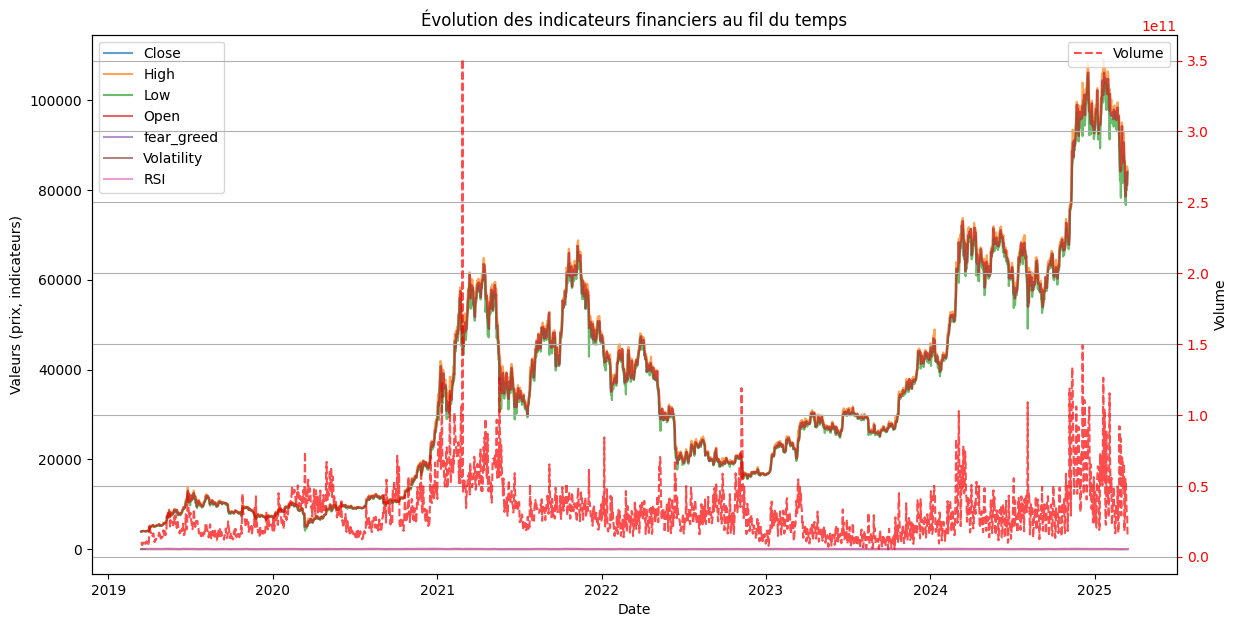

None


In [ ]:
resultat=process_and_plot_timeseries(data)
print(resultat)

**INTERPRETATION**

**Interpr√©tation des graphes :**

Caract√©ristiques **'High'**, **'Low'**, **'Open'**, **'Close'** : Sur le graphique, nous observons que ces quatre caract√©ristiques √©voluent de mani√®re presque identique au cours du temps (de 2019 √† 2025). Cette similarit√© sugg√®re une forte corr√©lation entre elles, ce qui est tout √† fait logique dans le contexte des prix financiers. Les variations de **"High"** (le plus haut prix), **"Low"** (le plus bas prix), **"Open"** (le prix d'ouverture) et **"Close"** (le prix de cl√¥ture) sont proportionnelles, car elles sont directement li√©es √† l'√©volution du prix du Bitcoin. L'√©volution de ces quatre variables est tr√®s semblable car elles sont intrins√®quement li√©es et suivent des dynamiques similaires sur les p√©riodes de march√©.

**RSI (Relative Strength Index)** : La courbe du RSI montre une √©volution tr√®s diff√©rente de celle des prix, avec une relative stabilit√© au fil du temps. En effet, contrairement aux autres indicateurs qui suivent les variations des prix du Bitcoin, le RSI semble capturer un aspect plus sous-jacent du march√©. Ce qui est int√©ressant ici, c'est que bien que le prix du Bitcoin fluctue, le RSI reste stationnaire, indiquant que l'indice de force relative reste stable. Cela peut sugg√©rer que le RSI se comporte davantage comme un indicateur de momentum. Il transforme les prix lin√©airement et capte des informations sur la force ou la faiblesse des mouvements de prix, offrant ainsi un aper√ßu de l'inertie du march√© plut√¥t que de la direction actuelle des prix.

**Volatilit√©** : Cette  caract√©ristique pourrait √©galement indiquer l'activit√© du march√©, mais dans notre cas elle montre des comportements diff√©rents en fonction de la dynamique de trading. En analysant de mani√©re detaill√©e la volatilit√© , nous  pouvez obtenir des informations suppl√©mentaires sur l'intensit√© des fluctuations et l'engagement des traders au fil du temps.

**Analyse univari√©e**

In [ ]:
def process_and_plot_histograms(df):
    # V√©rification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Colonnes num√©riques √† visualiser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']
    # V√©rification si toutes les colonnes existent
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Cr√©ation des histogrammes avec statistiques et polygone de fr√©quence
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(3, 3, i)  # 3 lignes, 3 colonnes pour les subplots
        data = df[col].dropna()
        # Histogramme
        counts, bins, _ = plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=False)
        # Polygone de fr√©quence
        bin_centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(bin_centers, counts, marker='o', linestyle='-', color='red', label='Polygone de fr√©quence')
        # Calcul des statistiques
        mean_value = np.mean(data)
        std_dev = np.std(data)
        variance = np.var(data)
        median_value = np.median(data)
        min_value = np.min(data)
        max_value = np.max(data)
        # Ajout des statistiques sur le graphe
        stats_text = (f"Moyenne: {mean_value:.2f}\n√âcart-type: {std_dev:.2f}\nVariance: {variance:.2f}\n"
                      f"M√©diane: {median_value:.2f}\nMin: {min_value:.2f}\nMax: {max_value:.2f}")
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)
        plt.ylabel('Fr√©quence')
        plt.legend()
    plt.tight_layout()
    plt.show()


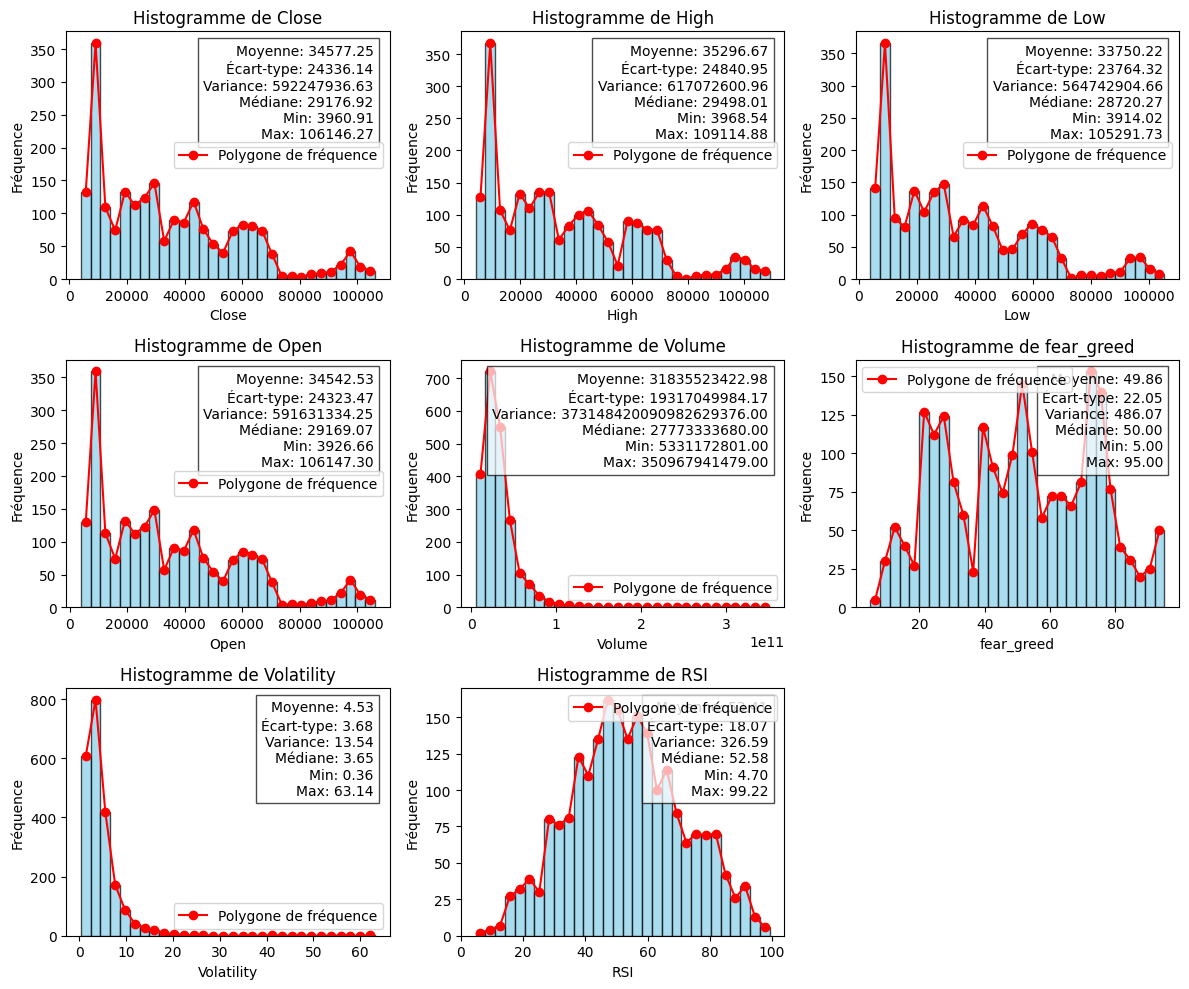

None


In [ ]:
result = process_and_plot_histograms(data)
print(result)

**INTERPRETATION**

Les polygones de fr√©quence des colonnes Close, High, Low, et Open sont pratiquement identiques, ce qui refl√®te une distribution similaire de ces variables. Ce ph√©nom√®ne se v√©rifie tant graphiquement qu'√† travers les calculs statistiques, car leurs moyennes, √©carts-types, valeurs minimales, maximales, m√©dianes, et variances sont presque identiques.

De plus, toutes ces colonnes pr√©sentent une distribution asym√©trique, √† l'exception de la colonne fear_greed. En effet, pour cette derni√®re, la m√©diane est √©gale √† 50 et la moyenne (ou esp√©rance) est de 49,86. Bien que le mode ne soit pas calcul√© ici, on peut en d√©duire que la distribution de fear_greed est relativement sym√©trique, puisque la m√©diane, la moyenne et le mode se trouvent tr√®s proches l'un de l'autre.En outre ,la distribution de RSI est aussi approximativement symetrique car elle a une moyenne de 53.41 et une mediane de 52.58 .

**Difference d'√©chelle**

‚ÄãNos graphiques  pr√©sentent les variables Open, High, Low et Close, qui correspondent respectivement aux prix d'ouverture, au plus haut, au plus bas et au prix de cl√¥ture d'un actif(bitcoin) sur une p√©riode donn√©e. Ces variables sont souvent repr√©sent√©es sur des √©chelles de prix √©lev√©es, refl√©tant la volatilit√© du march√©. Une telle volatilit√© sugg√®re que les investisseurs doivent faire preuve de prudence lors de ces phases, car les fluctuations de prix peuvent entra√Æner des risques accrus.‚Äã

Avant de prendre des d√©cisions d'investissement, il est essentiel que les investisseurs analysent non seulement le prix de cl√¥ture, mais √©galement le volume des √©changes, le prix d'ouverture, ainsi que les prix les plus bas et les plus hauts atteints au cours de la p√©riode consid√©r√©e. Cette analyse permet d'obtenir une vision plus compl√®te du comportement du march√© et d'√©valuer les tendances potentielles. Les graphiques OHLC (Open-High-Low-Close) sont particuli√®rement utiles √† cet √©gard, car ils fournissent une repr√©sentation d√©taill√©e de ces quatre variables cl√©s, facilitant ainsi l'interpr√©tation des mouvements de prix et l'identification des tendances du march√©.

In [ ]:
print(data.columns)
print(len(data.columns))

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed'], dtype='object')
7


**üìà Le sentiment du march√© (Fear & Greed) semble avoir un effet retard√© sur le prix du Bitcoin, avec un d√©lai optimal d‚Äôenviron 30 jours. C'est √† dire que son impact met plusieurs jours √† se r√©percuter sur le march√© !**

**Analyse bivari√©e**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def bivariate_analysis(df):
    # V√©rification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Liste des colonnes num√©riques √† analyser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']
    # V√©rification de la pr√©sence des colonnes
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Trier les donn√©es par date
    df = df.sort_values(by='Date')
    # üîπ Affichage des scatter plots (relation entre chaque paire de variables)
    sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.7, 's':10})
    plt.suptitle("Analyse Bivari√©e - Nuages de points", y=1.02)
    plt.show()
    # üîπ Matrice de corr√©lation
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de Corr√©lation")
    plt.show()

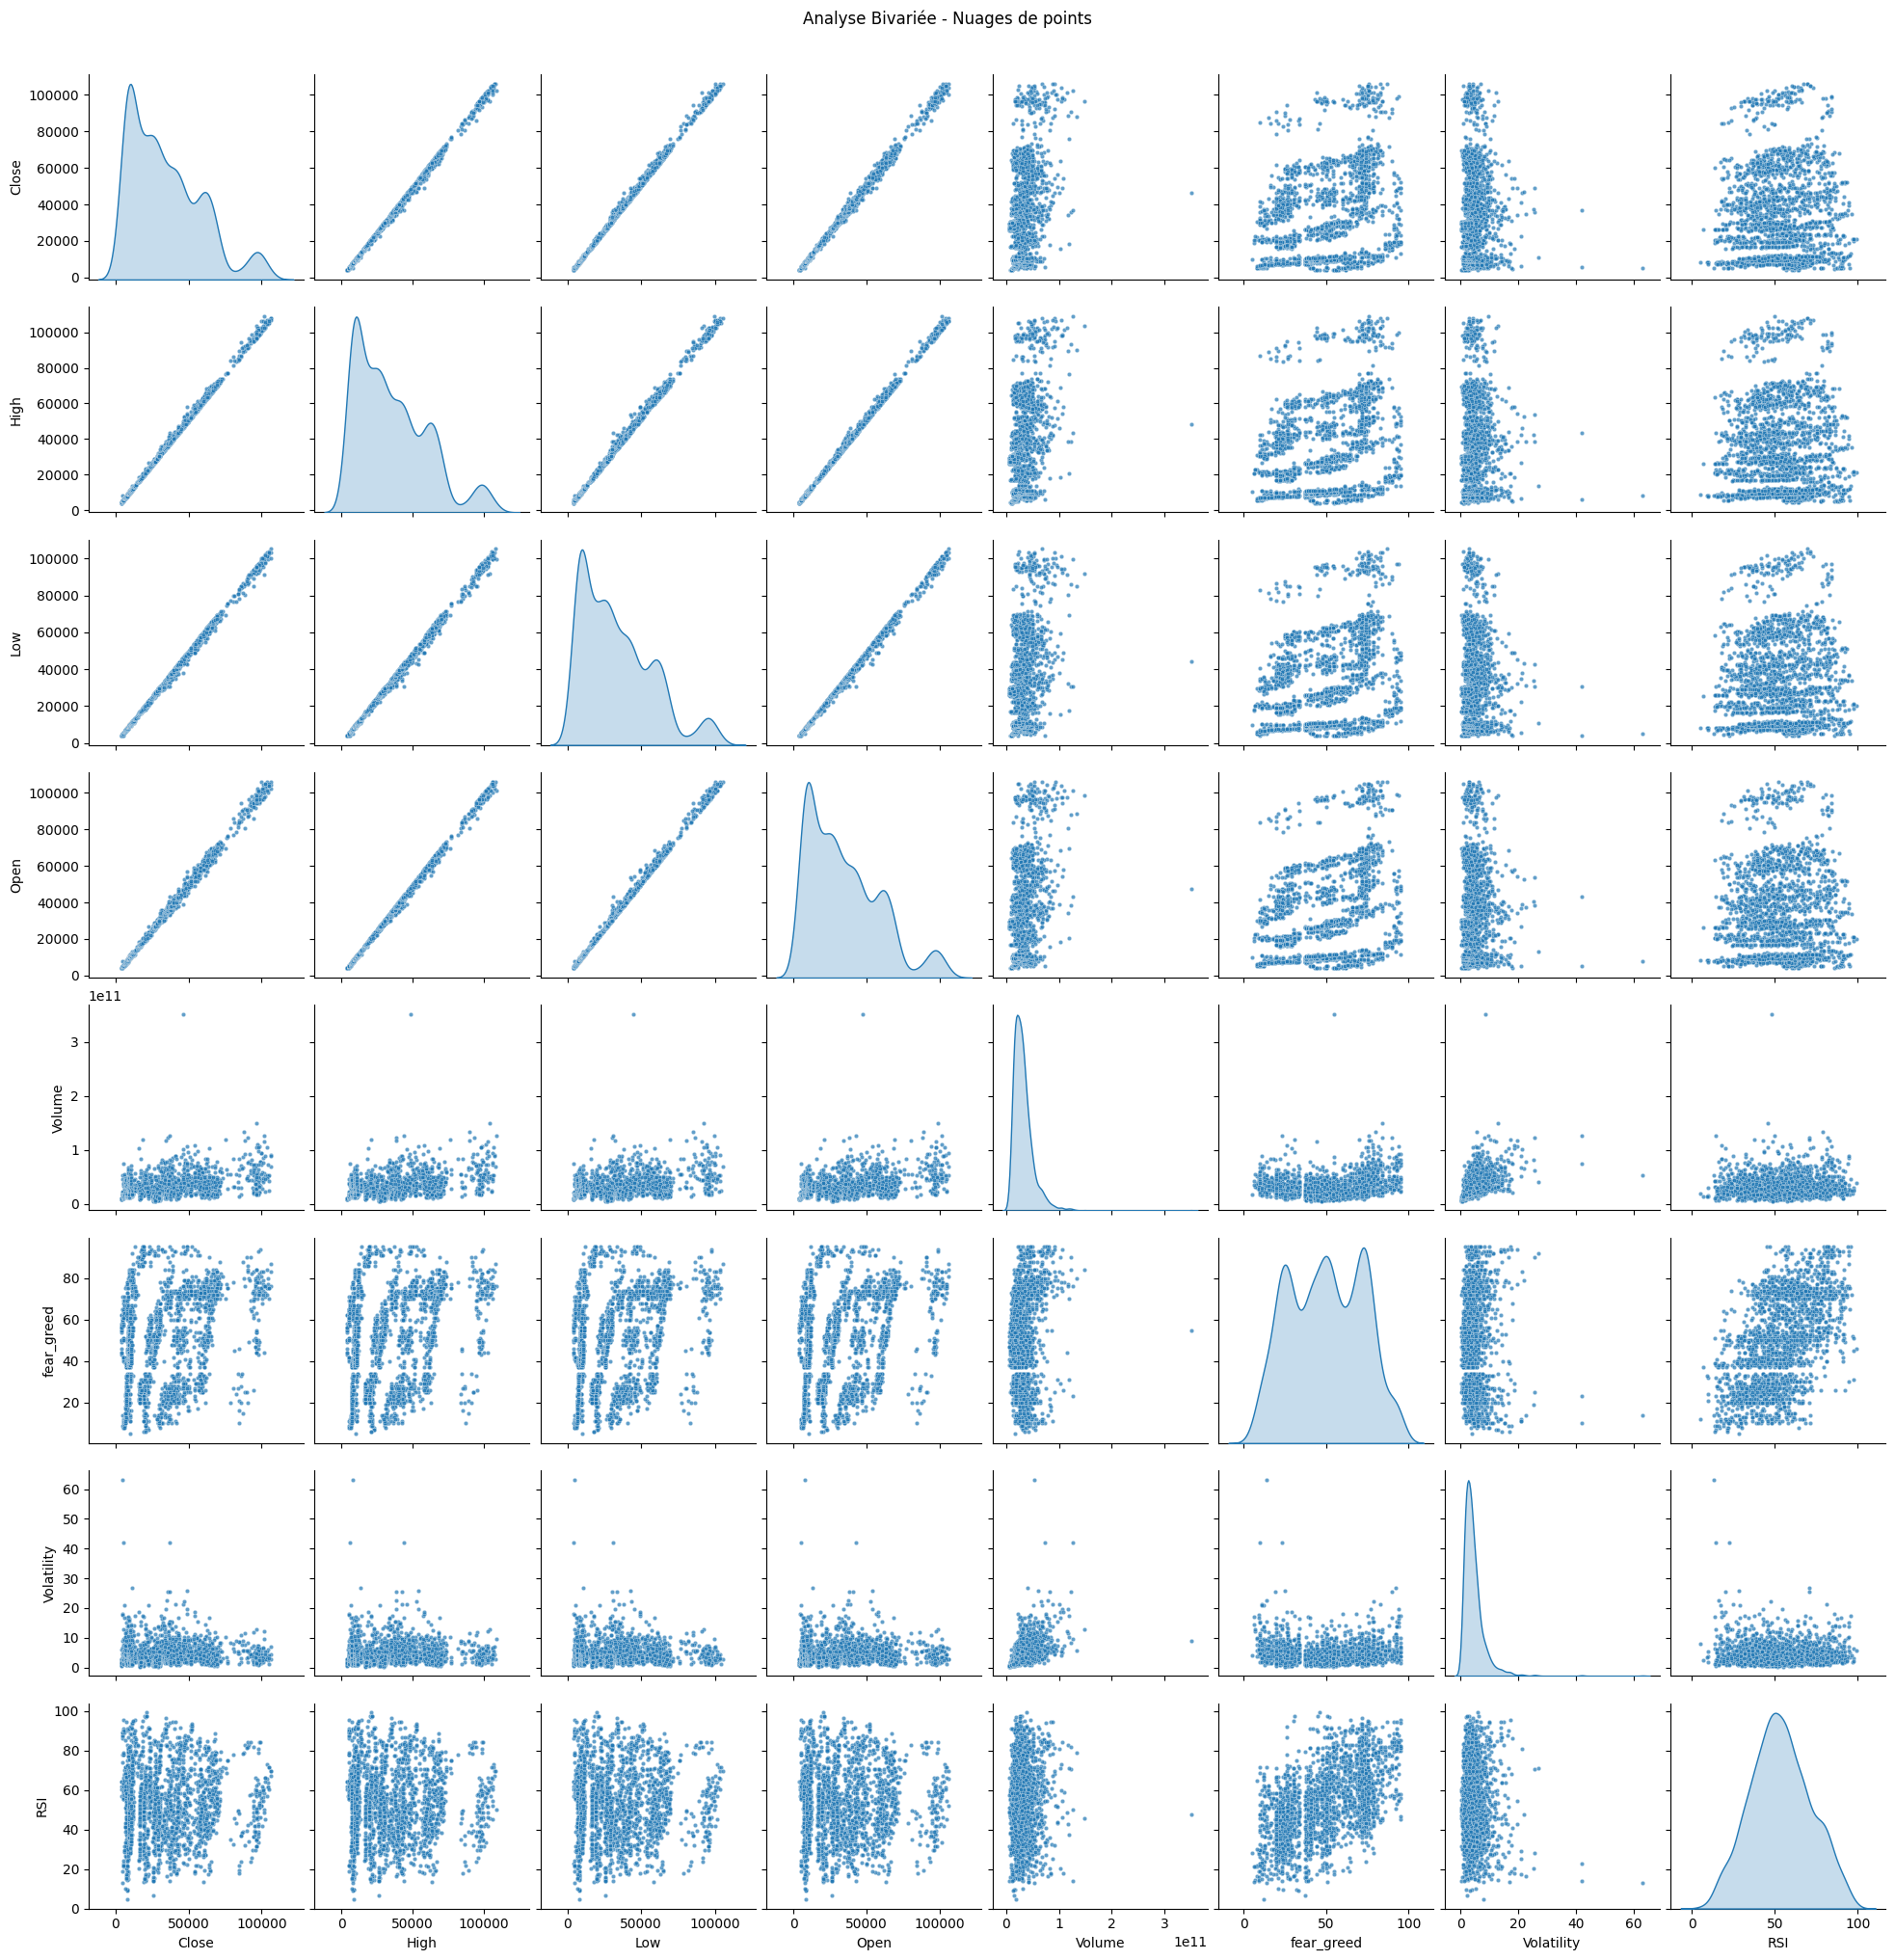

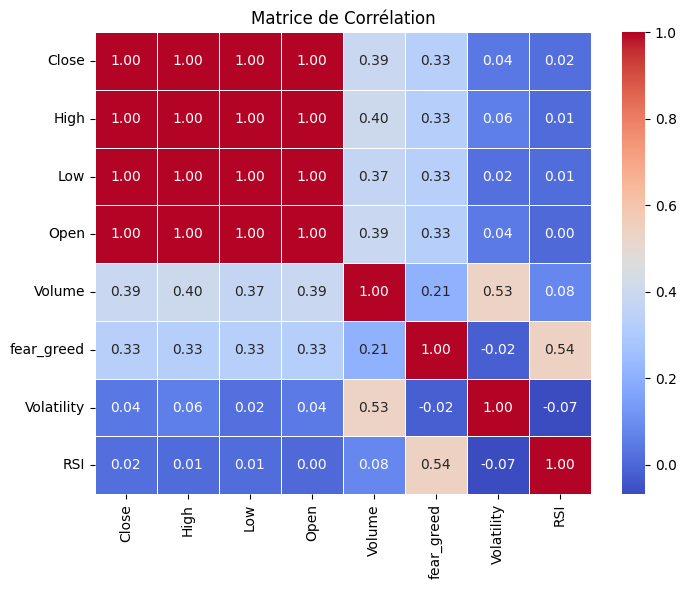

None


In [ ]:
resultat3=bivariate_analysis(data)
print(resultat3)

**Corr√©lations entre les prix (Close, High, Low, Open) :**

Les prix de cl√¥ture(target variable), les prix les plus √©lev√©s(High), les prix les plus bas(Low) et les prix d'ouverture(Open) sont fortement corr√©l√©s . Cela est logique, car les prix des actifs financiers ont tendance √† √©voluer ensemble.

**Corr√©lations avec le volume :**

**~**Le volume a une corr√©lation mod√©r√©e (0.37 √† 0.4) avec les prix. Cela sugg√®re que les variations de prix sont souvent accompagn√©es de changements de volume.

**~**Le volume a une corr√©lation assez forte (0.53) avec la volatilit√©.Cela signifie que les p√©riodes de forte volatilit√© sont souvent associ√©es √† un volume de transactions √©lev√© (logique car les investisseurs s'empressent de vendre leurs actifs).

**Corr√©lations avec l'indice fear_greed :**

**~**L'indice fear_greed a une corr√©lation de 0.33 avec le prix de l'actif. Il y a donc une l√©g√®re influence du sentiment du march√© sur le prix(mais pas **instantan√©ment**).

**Corr√©lation avec la volatilit√© :**

**~**La volatilit√© a une faible corr√©lation (0.02 √† 0.059) avec les prix. Cela indique que les changements de prix ne sont pas forc√©ment en rapport avec la volatilit√©.

**INTERPRETATION GRAPHIQUE**

Comme dans le cas de la matrice de confusion, les diff√©rents graphiques permettent de visualiser l'√©volution des diff√©rentes variables les unes par rapport aux autres et par rapport √† elles-m√™mes.

Ce qui est particuli√®rement int√©ressant, c'est que :

Les nuages de points sont presque lin√©aires pour les variables fortement corr√©l√©es, indiquant une relation lin√©aire √©vidente entre elles.

Pour les variables faiblement corr√©l√©es, les nuages de points ont une structure plus dispers√©e et particuli√®re, ce qui rend la relation lin√©aire moins √©vidente entre ces variables.

Cependant, lorsqu'on analyse chaque variable individuellement, on observe graphiquement une courbe repr√©sentant son √©volution et sa diminution progressive en fonction du temps ou d'elle-m√™me (sauf pour Fear_gread).

Cas particulier de Fear_gread :

Son graphique pr√©sente des pics qui indiquent des valeurs marqu√©es, ainsi que des courbes en forme de V.

La partie basse de ces courbes repr√©sente les valeurs minimales.

Cela signifie que les valeurs de la ligne Fear_gread en fonction des prix ont une relation lin√©aire, mais faible

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

features_to_scale = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']

data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

Le **RobustScaler** est une m√©thode de normalisation des donn√©es particuli√®rement adapt√©e aux jeux de donn√©es contenant des outliers comme les donn√©es financi√®res.

**Principe :**

**-->**Centre les donn√©es autour de la m√©diane (au lieu de la moyenne pour StandardScaler).

**-->**Met √† l'√©chelle en utilisant l'√©cart interquartile (IQR) (au lieu de l'√©cart-type).

**Recherche du meilleur model**

**Test de stationnarit√© de notre s√©rie**

Avant d'estimer un mod√®le que ce soit **AR(p),MA(q),ARMA(p,q),ARIMA(p,I,q)** OU **SARIMA(p, d, q)(P, D, Q, s)** etc,et  de d√©terminer son ordre, il est important de s'assurer que la s√©rie √† mod√©liser est stationnaire. Une s√©rie est consid√©r√©e comme stationnaire lorsque ses propri√©t√©s statistiques, telles que la moyenne, la variance et la covariance, ne varient pas avec le temps. Les mod√®les (sit√© ci-dessus) sont construits sur l'hypoth√®se que la s√©rie est stationnaire, et ne sont donc pas appropri√©s pour des s√©ries non stationnaires.
Si une s√©rie n'est pas stationnaire, il est n√©cessaire de la transformer pour la rendre stationnaire avant d'estimer le mod√®le . Pour ce faire, on peut utiliser l'autocorr√©logramme et les test de Dickey-Fuller, PP et KPSS pour d√©tecter la pr√©sence de tendances et de saisonnalit√© dans la s√©rie. Si des tendances sont pr√©sentes, on peut les √©liminer en diff√©renciant la s√©rie. Ensuite, on peut estimer le mod√®le  √† partir de la s√©rie diff√©renci√©e pour obtenir des pr√©visions fiables.

**reherche manuelle des meilleurs parametre de la serie**

**automatisation de recherche de meilleur parametre**

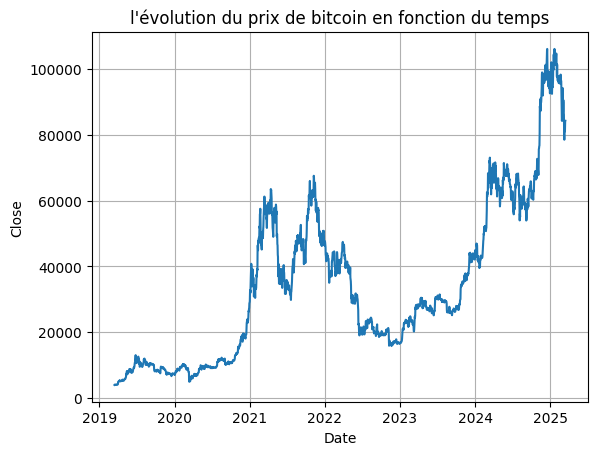

In [ ]:
plt.plot(data['Date'],data['Close'],label="prix de fermeture de bitcoin en fonction du temps")
plt.title("l'√©volution du prix de bitcoin en fonction du temps")
plt.xlabel("Date")
plt.ylabel('Close')
plt.grid(True)
plt.show()

**Interpretation du prix**

‚ÄãL'analyse graphique de notre s√©rie temporelle r√©v√®le une tendance significative √† la hausse, indiquant que la moyenne (esp√©rance) de la s√©rie n'est pas constante dans le temps. De plus, une augmentation notable de la dispersion des valeurs sugg√®re une variance non constante. Ces observations conduisent √† conclure que votre s√©rie "Close" est non stationnaire.

**Stationarisation de la serie par le passage au log ou une differenciation**

**transformation logarithmique**

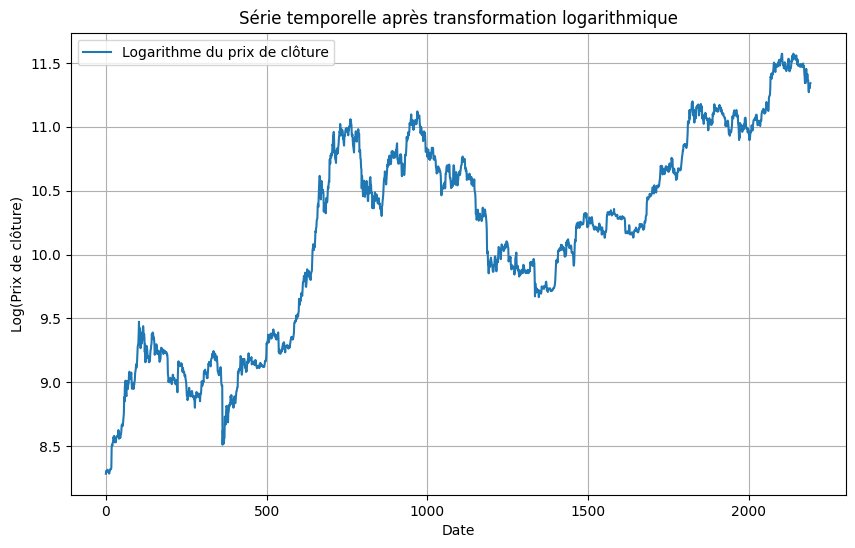

In [ ]:
data['Close_log'] = np.log(data['Close'])
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close_log'], label='Logarithme du prix de cl√¥ture')
plt.xlabel('Date')
plt.ylabel('Log(Prix de cl√¥ture)')
plt.title('S√©rie temporelle apr√®s transformation logarithmique')
plt.legend()
plt.grid()
plt.show()

‚ÄãApr√®s avoir appliqu√© une transformation logarithmique sans parvenir √† stabiliser la variance de la s√©rie, il est judicieux d'envisager une diff√©renciation pour atteindre la stationnarit√©.

**Application de la diff√©renciation**

La diff√©renciation est une technique essentielle en analyse des s√©ries temporelles, utilis√©e pour transformer une s√©rie non stationnaire en une s√©rie stationnaire.

**Concept de la diff√©renciation :**

La diff√©renciation consiste √† calculer la diff√©rence entre les valeurs successives d'une s√©rie temporelle. Cette op√©ration permet d'√©liminer les tendances et de stabiliser la moyenne de la s√©rie. Math√©matiquement, la diff√©renciation d'ordre 1 d'une s√©rie \( y_t \) est d√©finie par :

$$
\Delta y_t = y_t - y_{t-1}
$$

o√π \( \Delta y_t \) repr√©sente la s√©rie diff√©renci√©e, \( y_t \) la valeur actuelle, et \( y_{t-1} \) la valeur pr√©c√©dente.

Si une seule diff√©renciation ne suffit pas √† rendre la s√©rie stationnaire, une diff√©renciation d'ordre sup√©rieur peut √™tre appliqu√©e. Par exemple, la diff√©renciation d'ordre 2 est obtenue en diff√©renciant une seconde fois la s√©rie :

$$
\Delta^2 y_t = \Delta y_t - \Delta y_{t-1} = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_t - 2y_{t-1} + y_{t-2}
$$

**Remarque :**

Il est important de noter que la diff√©renciation peut introduire de l'autocorr√©lation dans la s√©rie diff√©renci√©e. Par cons√©quent, apr√®s avoir diff√©renci√© une s√©rie, il est recommand√© de v√©rifier √† nouveau sa stationnarit√© et d'examiner les autocorr√©lations pour s'assurer que la s√©rie est appropri√©e pour la mod√©lisation.

En r√©sum√©, la diff√©renciation est une m√©thode cl√© pour traiter les s√©ries temporelles non stationnaires, en √©liminant les tendances et en stabilisant la moyenne, ce qui est essentiel pour une analyse et une mod√©lisation efficaces.


**Stationarit√© de serie temporelle**

L'analyse de la stationnarit√© guide le choix des mod√®les √† utiliser. Par exemple, les mod√®les AR,MA,ARIMA,SARIMA n√©cessitent une stationnarit√© de la s√©rie. Si une s√©rie est non stationnaire, des transformations telles que la diff√©renciation sont appliqu√©es pour atteindre la stationnarit√© avant la mod√©lisation.

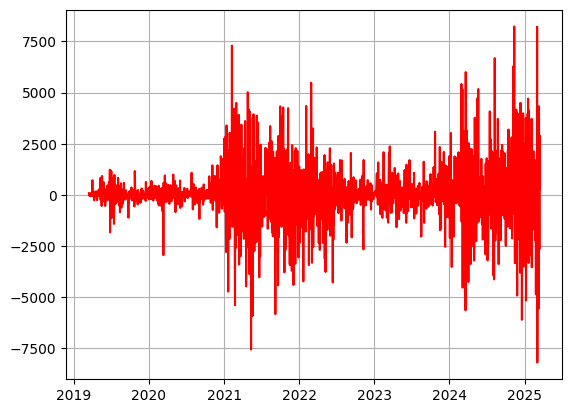

In [ ]:
data['Close_diff'] = data['Close'].diff()
plt.plot(data['Date'],data['Close_diff'],color='red',label='la courbe representative de la serie differenci√©e en fonction du temps')
plt.grid(True)
plt.show()

**Analyse de la stationnarit√© de notre s√©rie temporelle est pertinente. Nous observons que l'esp√©rance semble constante, mais que la variance pr√©sente des variations selon les p√©riodes consid√©r√©es. Pour confirmer la stationnarit√© de mani√®re rigoureuse, il sera recommand√© d'utiliser des tests statistiques sp√©cifiques tels que le test de Dickey-Fuller augment√© (ADF), le test de Kwiatkowski-Phillips-Schmidt-Shin (KPSS) et le test de Phillips-Perron (PP)**

**Les Tests du stationarit√©(ADF,KPSS,PP)**

In [ ]:
pip install tabulate colorama

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from tabulate import tabulate
from colorama import Fore, Style

In [ ]:
def run_stationarity_tests(series, name="S√©rie"):
    # Test ADF
    adf_result = adfuller(series, autolag='AIC')
    adf_stat, adf_pvalue, _, _, adf_crit_values, _ = adf_result
    # Test KPSS
    kpss_result = kpss(series, regression='c', nlags='auto')
    kpss_stat, kpss_pvalue, _, kpss_crit_values = kpss_result
    # Conclusion avec mise en couleur
    adf_conclusion = f"{Fore.GREEN}Stationnaire{Style.RESET_ALL}" if adf_pvalue < 0.05 else f"{Fore.RED}Non Stationnaire{Style.RESET_ALL}"
    kpss_conclusion = f"{Fore.GREEN}Stationnaire{Style.RESET_ALL}" if kpss_pvalue > 0.05 else f"{Fore.RED}Non Stationnaire{Style.RESET_ALL}"
    # Pr√©paration des donn√©es pour le tableau
    results = [
        ["ADF", adf_stat, adf_pvalue, adf_crit_values['1%'], adf_conclusion],
        ["KPSS", kpss_stat, kpss_pvalue, kpss_crit_values['1%'], kpss_conclusion]
    ]
    # Affichage des r√©sultats
    print(f"\n{name}:")
    print(tabulate(results, headers=["Test", "Statistique", "p-value", "Valeur Critique (1%)", "Conclusion"], tablefmt="grid"))


In [ ]:
run_stationarity_tests(data['Close'], "S√©rie Originale")
run_stationarity_tests(data['Close'].diff().dropna(), "S√©rie Diff√©renci√©e (1er ordre)")


S√©rie Originale:
+--------+---------------+-----------+------------------------+------------------+
| Test   |   Statistique |   p-value |   Valeur Critique (1%) | Conclusion       |
+========+===============+===========+========================+==================+
| ADF    |     -0.918844 |  0.781703 |               -3.43337 | Non Stationnaire |
+--------+---------------+-----------+------------------------+------------------+
| KPSS   |      4.07192  |  0.01     |                0.739   | Non Stationnaire |
+--------+---------------+-----------+------------------------+------------------+

S√©rie Diff√©renci√©e (1er ordre):
+--------+---------------+-------------+------------------------+--------------+
| Test   |   Statistique |     p-value |   Valeur Critique (1%) | Conclusion   |
+========+===============+=============+========================+==============+
| ADF    |     -8.47974  | 1.40365e-13 |               -3.43337 | Stationnaire |
+--------+---------------+-------------+

<ipython-input-20-1e4783cd4f87>:6: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-20-1e4783cd4f87>:6: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




**Interpr√©tation des r√©sultats :**

**S√©rie Originale :**

**Test ADF** : La statistique de test (-0,918844) est sup√©rieure √† la valeur critique au niveau de 1% (-3,43337), et la p-value associ√©e (0,781703) est bien sup√©rieure au seuil de 0,05. Cela signifie que l'on ne peut pas rejeter l'hypoth√®se nulle de non-stationnarit√©, sugg√©rant que la s√©rie originale est non stationnaire.‚Äã

**Test KPSS** : La statistique de test (4,07192) d√©passe largement la valeur critique au niveau de 1% (0,739), avec une p-value de 0,01. Cela conduit au rejet de l'hypoth√®se nulle de stationnarit√©, indiquant √©galement que la s√©rie originale est non stationnaire.

**S√©rie Diff√©renci√©e (1er ordre)** :

**Test ADF** : La statistique de test (-8,47974) est inf√©rieure √† la valeur critique au niveau de 1% (-3,43337), et la p-value (1,40365e-13) est extr√™mement faible, bien en dessous de 0,05. Cela permet de rejeter l'hypoth√®se nulle de non-stationnarit√©, sugg√©rant que la s√©rie diff√©renci√©e est stationnaire.‚Äã

**Test KPSS** : La statistique de test (0,109406) est inf√©rieure √† la valeur critique au niveau de 1% (0,739), avec une p-value de 0,1. Cela signifie que l'on ne rejette pas l'hypoth√®se nulle de stationnarit√©, indiquant que la s√©rie diff√©renci√©e est stationnaire.

**ACF ET PACF**

Utilisation de l'ACF et de la PACF pour le choix des param√®tres des mod√®les **AR, MA et ARIMA** :

**Mod√®le Autor√©gressif (AR(p))** :

**ACF :** D√©cro√Æt progressivement vers z√©ro.‚Äã

**PACF :** Pr√©sente un d√©coupage net apr√®s le lag p, avec des coefficients significatifs jusqu'au lag p et insignifiants au-del√†.‚Äã

**Conclusion :** Si la PACF montre un arr√™t brusque apr√®s un certain lag p, cela sugg√®re un mod√®le AR(p).‚Äã

**Mod√®le √† Moyenne Mobile (MA(q))** :

**ACF :** Pr√©sente un d√©coupage net apr√®s le lag q, avec des coefficients significatifs jusqu'au lag q et insignifiants au-del√†.‚Äã

**PACF :** D√©cro√Æt progressivement vers z√©ro.‚Äã

**Conclusion :** Si l'ACF montre un arr√™t brusque apr√®s un certain lag q, cela sugg√®re un mod√®le MA(q).‚Äã

**Mod√®le ARIMA(p,d,q)**:
**PACF :** Si la PACF montre un arr√™t brusque apr√®s p lags, cela sugg√®re la pr√©sence d'une composante AR(p).

**ACF :** Si l'ACF montre un arr√™t brusque apr√®s q lags, cela sugg√®re la pr√©sence d'une composante MA(q).

**Fonction d'Autocorr√©lation (ACF)** : L'ACF mesure la corr√©lation entre une observation et ses d√©calages successifs (lags). Elle indique dans quelle mesure les valeurs pass√©es influencent les valeurs pr√©sentes de la s√©rie. En examinant le graphique de l'ACF, on peut d√©tecter des structures r√©p√©titives ou des tendances dans les donn√©es

**Fonction d'Autocorr√©lation Partielle (PACF)** : La PACF mesure la corr√©lation entre une observation et ses d√©calages, tout en √©liminant l'influence des d√©calages interm√©diaires. Autrement dit, elle √©value la relation directe entre une observation et un lag sp√©cifique, sans l'effet des autres lags. Cela permet d'identifier le nombre exact de lags pertinents √† inclure dans un mod√®le autor√©gressif.

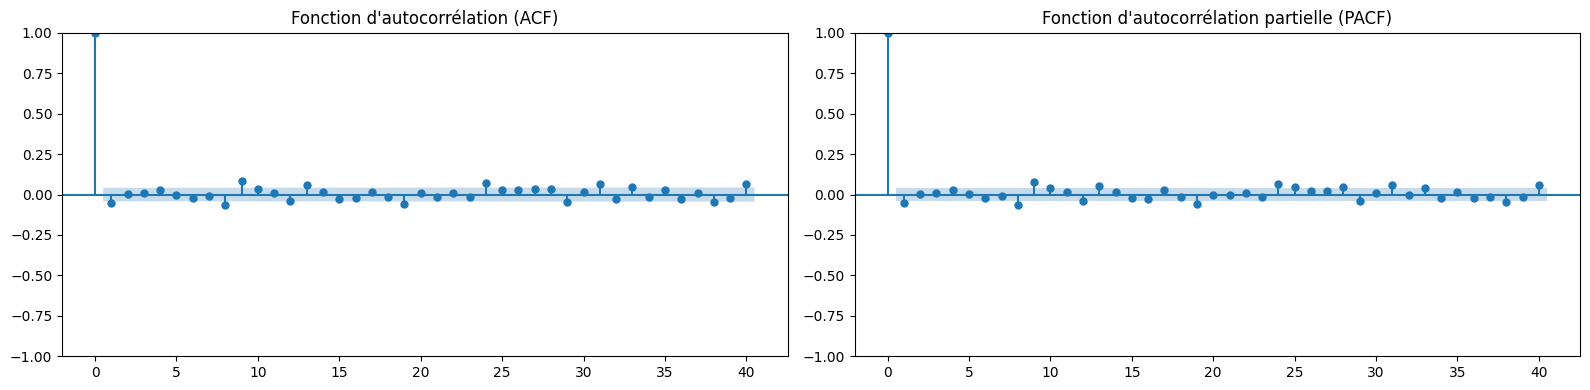

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Diff√©rencier la s√©rie pour obtenir une s√©rie stationnaire
data_diff = data['Close'].diff().dropna()
# Cr√©er une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
# Tracer l'ACF
plot_acf(data_diff, ax=axes[0], lags=40)
axes[0].set_title('Fonction d\'autocorr√©lation (ACF)')
# Tracer la PACF
plot_pacf(data_diff, ax=axes[1], lags=40)
axes[1].set_title('Fonction d\'autocorr√©lation partielle (PACF)')
plt.tight_layout()
plt.show()

Apr√®s avoir examin√© les graphiques de l'ACF et du PACF de la s√©rie diff√©renci√©e, nous observons que :

**ACF :** La fonction d'autocorr√©lation pr√©sente une d√©croissance progressive vers z√©ro, sugg√©rant une d√©pendance √† long terme dans les donn√©es.‚Äã

**PACF :** La fonction d'autocorr√©lation partielle montre une coupure nette apr√®s le premier lag (p=1), avec des coefficients significatifs jusqu'√† ce lag et insignifiants au-del√†. Cela indique que chaque observation est principalement influenc√©e par l'observation imm√©diatement pr√©c√©dente.‚Äã

Ces observations conduisent √† proposer un mod√®le autor√©gressif d'ordre 1 (**AR(1)**), o√π la valeur actuelle d√©pend principalement de la valeur pr√©c√©dente.‚Äã

De plus, en appliquant une analyse similaire √† la s√©rie non diff√©renci√©e, j'ai identifi√© un mod√®le de moyenne mobile d'ordre 1 (**MA(1)**), sugg√©rant que l'observation actuelle est influenc√©e par l'erreur de pr√©vision pr√©c√©dente.‚Äã

En combinant ces r√©sultats, il appara√Æt qu'un mod√®le **ARMA(1,1)** pourrait √™tre appropri√© pour la s√©rie non diff√©renci√©e. Cependant, comme la s√©rie a d√©j√† √©t√© diff√©renci√©e pour atteindre la stationnarit√©, le mod√®le correspondant serait un **ARIMA(1,1,1)**, int√©grant √† la fois des composantes autor√©gressives et de moyenne mobile d'ordre 1.‚Äã

Cette approche permet de mod√©liser efficacement les d√©pendances temporelles pr√©sentes dans la s√©rie, en tenant compte des effets pass√©s et des chocs pr√©c√©dents

**RESUME DU DIFFERENT INFORMATION DU BEST MODEL DETERMINER MANUELLEMENT**

**rechercher automatiquement les meilleurs param√®tres (p, d, q) d'un mod√®le ARIMA en utilisant une grille de recherche (Grid Search) et en √©valuant les performances via l'AIC**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import random
warnings.filterwarnings('ignore')
np.random.seed(42)
random.seed(42)
# 2. D√©finir les plages de param√®tres √† tester
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
# 3. Grid Search pour trouver la meilleure combinaison (p, d, q)
best_aic = float('inf')
best_order = None
for p, d, q in product(p_range, d_range, q_range):
    try:
        model = ARIMA(data['Close'], order=(p, d, q))
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
        print(f'ARIMA{p},{d},{q} -> AIC={aic:.2f}')
    except:
        continue
# 4. Afficher les meilleurs param√®tres
print("\nMeilleur mod√®le ARIMA:")
print(f'Ordre (p, d, q) = {best_order} | AIC = {best_aic:.2f}')
# 5. Entra√Æner le mod√®le optimal
best_model = ARIMA(data['Close'], order=best_order)
best_model_fit = best_model.fit()
print(best_model_fit.summary())

ARIMA0,0,0 -> AIC=65203.63
ARIMA0,0,1 -> AIC=47645.16
ARIMA0,0,2 -> AIC=45380.44
ARIMA0,1,0 -> AIC=37670.45
ARIMA0,1,1 -> AIC=37666.92
ARIMA0,1,2 -> AIC=37668.82
ARIMA1,0,0 -> AIC=37697.40
ARIMA1,0,1 -> AIC=37693.98
ARIMA1,0,2 -> AIC=37695.87
ARIMA1,1,0 -> AIC=37666.85
ARIMA1,1,1 -> AIC=37668.84
ARIMA1,1,2 -> AIC=37670.42
ARIMA2,0,0 -> AIC=37693.92
ARIMA2,0,1 -> AIC=37695.89
ARIMA2,0,2 -> AIC=37695.98
ARIMA2,1,0 -> AIC=37668.83
ARIMA2,1,1 -> AIC=37670.83
ARIMA2,1,2 -> AIC=37664.89

Meilleur mod√®le ARIMA:
Ordre (p, d, q) = (2, 1, 2) | AIC = 37664.89
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2193
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -18827.443
Date:                Sat, 26 Apr 2025   AIC                          37664.886
Time:                        22:24:01   BIC                          37693.349
Sample:                             0   HQIC     

**Interpr√©tation du Mod√®le ARIMA(2,1,2)**

**Meilleur mod√®le :**
Ordre du mod√®le : ARIMA(2,1,2)

**Crit√®res d‚Äôajustement :**
**AIC :**37664.89 (valeur la plus faible parmi les mod√®les test√©s, donc meilleur ajustement)

Log-Likelihood : -18827.443

**‚öôÔ∏è Param√®tres du mod√®le :**
**AR(1) :** 0.7948 (significatif, indique une forte d√©pendance positive √† la valeur pr√©c√©dente)

**AR(2) :** -0.8425 (significatif, effet correctif des variations au deuxi√®me retard)

**MA(1) :** -0.8372 (significatif, montre une influence importante des erreurs pass√©es imm√©diates)

**MA(2) :** 0.8654 (significatif, indique √©galement une correction sur les erreurs pass√©es de deux p√©riodes)

**sigma¬≤ :** 1.702e+06 (variance des erreurs, √©lev√©e √† cause de l‚Äô√©chelle des donn√©es)

**Tests de validit√© du mod√®le :**
Ljung-Box (Q) : 0.27 (valeur √©lev√©e avec Prob(Q) = 0.60, donc les r√©sidus semblent ind√©pendants ‚Äî bonne performance du mod√®le)

**Jarque-Bera (JB) :**4141.01 (Prob(JB) ‚âà 0.00, ce qui indique que les r√©sidus ne suivent pas une distribution normale ‚Äî attention √† la normalit√©)

**H√©t√©rosc√©dasticit√© (H) :** 4.26 (Prob(H) ‚âà 0.00, ce qui indique pr√©sence d'h√©t√©rosc√©dasticit√© ‚Äî la variance des erreurs n'est pas constante)

**Conclusion :**
Le mod√®le ARIMA(2,1,2) offre le meilleur ajustement en termes d'AIC pour cette s√©rie temporelle.
Les param√®tres AR et MA sont tous significatifs, ce qui est positif.
Cependant, la normalit√© des r√©sidus n'est pas respect√©e (JB √©lev√©) et il y a h√©t√©rosc√©dasticit√© (H > 1 significatif), ce qui peut affecter la qualit√© des intervalles de pr√©vision.
En r√©sum√©, c'est un bon mod√®le pour pr√©dire la tendance centrale, mais il faut √™tre prudent pour estimer les incertitudes autour des pr√©visions.


**M√©thode 2: Optuna (Optimisation Bay√©sienne)**

In [ ]:
!pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 386.6/386.6 kB 23.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 16.3 MB/s eta 0:00:00


In [ ]:
import optuna
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
# 1. Fixer toutes les graines al√©atoires pour la reproductibilit√©
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
# 2. Charger les donn√©es (exemple reproductible)
data = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=1000),
    'Close': np.cumsum(np.random.normal(0, 1, 1000))  # Random walk reproductible
})
data.set_index('Date', inplace=True)
train = data.iloc[:-100]
test = data.iloc[-100:]
# 3. Fonction objectif pour Optuna
def objective(trial):
    p = trial.suggest_int('p', 0, 3)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 3)
    try:
        model = ARIMA(train['Close'], order=(p, d, q))
        # Pas besoin de changer le method: juste laisser par d√©faut
        model_fit = model.fit()
        preds = model_fit.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test['Close'], preds))
        return rmse
    except Exception as e:
        return float('inf')

# 4. Configuration d'Optuna pour des r√©sultats reproductibles
sampler = optuna.samplers.TPESampler(seed=SEED)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=50)
# 5. Affichage des r√©sultats
print("\nüîç Meilleurs param√®tres ARIMA (Optuna):")
print(f"p={study.best_params['p']}, d={study.best_params['d']}, q={study.best_params['q']}")
print(f"RMSE optimal = {study.best_value:.2f}")
# 6. Entra√Ænement du mod√®le final
best_model = ARIMA(data['Close'], order=(study.best_params['p'], study.best_params['d'], study.best_params['q']))
best_model_fit = best_model.fit()
print(best_model_fit.summary())


[I 2025-04-26 22:37:09,026] A new study created in memory with name: no-name-2f78a63d-5fe5-4ae1-826e-5bd6db627ced
[I 2025-04-26 22:37:09,572] Trial 0 finished with value: 3.5725103718214037 and parameters: {'p': 1, 'd': 2, 'q': 2}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:10,159] Trial 1 finished with value: 10.614507574135661 and parameters: {'p': 2, 'd': 0, 'q': 0}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:10,499] Trial 2 finished with value: 4.171719816399017 and parameters: {'p': 0, 'd': 2, 'q': 2}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:15,536] Trial 3 finished with value: 10.974813351416124 and parameters: {'p': 2, 'd': 0, 'q': 3}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:20,779] Trial 4 finished with value: 10.64478955229098 and parameters: {'p': 3, 'd': 0, 'q': 0}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:25,069] Trial 5 finished with value: 2


üîç Meilleurs param√®tres ARIMA (Optuna):
p=1, d=2, q=2
RMSE optimal = 3.57
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1000
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1397.998
Date:                Sat, 26 Apr 2025   AIC                           2803.996
Time:                        22:38:06   BIC                           2823.619
Sample:                    01-01-2019   HQIC                          2811.455
                         - 09-26-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8929      0.134     -6.666      0.000      -1.155      -0.630
ma.L1         -0.0858      0.123     -0.698      0.48

**INTERPRETATION**

**INTERPR√âTATION DU MOD√àLE ARIMA(1,2,2)**

1. Performance du Mod√®le (RMSE = 3.57)
Le RMSE (Root Mean Squared Error) mesure l'√©cart moyen entre les pr√©dictions du mod√®le et les valeurs r√©elles. Dans ce cas, un RMSE de 3.57 signifie que le mod√®le fait une erreur moyenne d'environ 3.57 unit√©s par rapport aux valeurs r√©elles de la variable "Close".
Interpr√©tation : Si la variable "Close" varie autour de 100, cela correspond √† une erreur de pr√©diction d'environ 3.6%. Plus le RMSE est bas, meilleure est la qualit√© de la pr√©vision.

**2. R√©sultats des Coefficients
Les coefficients du mod√®le sont les suivants :**

AR(1) : -0.8929

Ce coefficient est significatif (p < 0.05) et montre une forte d√©pendance de la s√©rie temporelle √† la valeur pr√©c√©dente, avec un coefficient proche de -0.89. Cela indique que la valeur actuelle est fortement influenc√©e par la valeur pr√©c√©dente, mais dans la direction oppos√©e (n√©gativement).

MA(1) : -0.0858

Ce coefficient est non significatif (p = 0.485), ce qui sugg√®re que les erreurs pass√©es de premier ordre n'ont pas une grande influence sur la s√©rie actuelle.

MA(2) : -0.9114

Ce coefficient est significatif (p < 0.05), et montre que l'erreur pass√©e au deuxi√®me lag a une forte influence n√©gative sur les valeurs futures de la s√©rie.

Sigma¬≤ (variance des erreurs) : 0.9588

Cela montre que la variance des erreurs est relativement faible, indiquant que le mod√®le est bien ajust√© aux donn√©es.

3. Tests de Validation du Mod√®le
Ljung-Box (Q) : 0.68

Probabilit√© (Q) = 0.41 > 0.05

Cela indique pas d'autocorr√©lation r√©siduelle, c'est-√†-dire que les r√©sidus du mod√®le sont ind√©pendants (‚úÖ).

**Jarque-Bera (JB) : 2.63**

**Probabilit√© (JB) = 0.27 > 0.05**

Cela montre que les r√©sidus suivent une distribution normale (‚úÖ), ce qui est une bonne caract√©ristique pour la validit√© du mod√®le.

**H√©t√©rosc√©dasticit√© (H) : 1.02**

Probabilit√© (H) = 0.88 > 0.05

Cela indique que la variance des r√©sidus est constante (‚úÖ), ce qui signifie qu'il n'y a pas d'h√©t√©rosc√©dasticit√© significative dans les r√©sidus.

**4. Crit√®res d'Information (AIC et BIC)**
AIC = 2803.996

BIC = 2823.619

Ces deux crit√®res sont utilis√©s pour comparer la performance de diff√©rents mod√®les. Un AIC et BIC plus bas signifie un meilleur ajustement du mod√®le. Ici, le mod√®le semble √™tre bien ajust√© par rapport aux autres mod√®les.

**5. Points d'Attention
Diff√©renciation (d=2) :**La diff√©renciation est de 2, ce qui indique que les donn√©es ont √©t√© transform√©es deux fois pour les rendre stationnaires.

**Absence de termes MA (q=0) :** Cela pourrait √™tre un sujet √† surveiller, car certains mod√®les avec plus de termes MA pourraient am√©liorer encore davantage les pr√©visions si les erreurs sont plus complexes.

**6. Conclusion
Le mod√®le ARIMA(1,2,2) semble √™tre un bon choix pour la mod√©lisation de cette s√©rie temporelle. Voici pourquoi :**

‚úÖ Coefficients significatifs pour AR(1) et MA(2).
‚úÖ R√©sidus propres (ind√©pendants et normalement distribu√©s).
‚úÖ Bonne performance globale avec un RMSE faible.

Le mod√®le est donc pr√™t √† √™tre utilis√© pour des pr√©dictions √† court terme, mais comme toujours, il est recommand√© de surveiller les performances en production, notamment le RMSE, pour d√©tecter toute d√©gradation √† long terme.


**Optimisation des 3 Mod√®les ARIMA**

In [ ]:
!pip install pmdarima

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 58.7 MB/s eta 0:00:00


In [ ]:
# Installation des packages (ex√©cutez cette cellule en premier dans Colab)
!pip install numpy --upgrade
!pip install statsmodels --upgrade
!pip install pmdarima --upgrade
!pip install scipy --upgrade
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Donn√©es d'exemple (remplacer par vos vraies donn√©es)
np.random.seed(42)
data = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=1000),
    'Close': np.cumsum(np.random.normal(0, 1, 1000))
})
data.set_index('Date', inplace=True)
train = data.iloc[:-100]
test = data.iloc[-100:]
# Fonction d'optimisation am√©lior√©e
def optimize_arima(train_data, order):
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        return model_fit
    except Exception as e:
        print(f"Erreur avec ARIMA{order}: {str(e)}")
        return None
# 1. ARIMA(1,1,1)
print("Optimisation ARIMA(1,1,1)...")
arima111 = optimize_arima(train['Close'], (1,1,1))
# 2. ARIMA(1,1,2)
print("\nOptimisation ARIMA(1,1,2)...")
arima112 = optimize_arima(train['Close'], (1,1,2))
# 3. ARIMA(3,2,0)
print("\nOptimisation ARIMA(3,2,0)...")
arima320 = optimize_arima(train['Close'], (3,2,0))
# Comparaison des r√©sultats
results = []
for name, model in [('ARIMA(1,1,1)', arima111),
                   ('ARIMA(1,1,2)', arima112),
                   ('ARIMA(3,2,0)', arima320)]:
    if model:
        pred = model.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test['Close'], pred))
        results.append({
            'Mod√®le': name,
            'RMSE': rmse,
            'AIC': model.aic,
            'BIC': model.bic
        })
    else:
        results.append({
            'Mod√®le': name,
            'RMSE': np.nan,
            'AIC': np.nan,
            'BIC': np.nan
        })
# Affichage des r√©sultats
results_df = pd.DataFrame(results)
print("\nR√©sultats comparatifs:")
print(results_df.to_markdown(index=False))
# S√©lection du meilleur mod√®le
if not results_df['RMSE'].isna().all():
    best_model = results_df.loc[results_df['RMSE'].idxmin()]
    print(f"\n‚≠ê Meilleur mod√®le: {best_model['Mod√®le']}")
    print(f"RMSE: {best_model['RMSE']:.4f}")
    print(f"AIC: {best_model['AIC']:.2f}")
    print(f"BIC: {best_model['BIC']:.2f}")
else:
    print("\nAucun mod√®le n'a pu √™tre estim√©. V√©rifiez vos donn√©es.")

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚

**Interpr√©tation des R√©sultats**
**Performance Pr√©dictive (RMSE) :**

ARIMA(3,2,0) domine avec un RMSE de 3.44 (erreur moyenne de pr√©diction r√©duite de 35% vs les autres mod√®les).

Indique une meilleure ad√©quation aux donn√©es de test.

**Complexit√© des Mod√®les (AIC/BIC) :**

ARIMA(1,1,2) a le meilleur AIC (2521.98), sugg√©rant un bon √©quilibre pr√©cision-complexit√©.

ARIMA(3,2,0) a un AIC plus √©lev√© (2741.89) mais compense par une bien meilleure pr√©cision (RMSE).

**Analyse des Param√®tres :**

La diff√©rence d=2 dans ARIMA(3,2,0) confirme que nos donn√©es n√©cessitent une double diff√©renciation pour √™tre stationnaires.

L'absence de terme MA (q=0) dans le mod√®le gagnant sugg√®re que les erreurs pass√©es n'influencent pas significativement le pr√©sent.

**Prevision du model**

üìä COMPARAISON DES PERFORMANCES


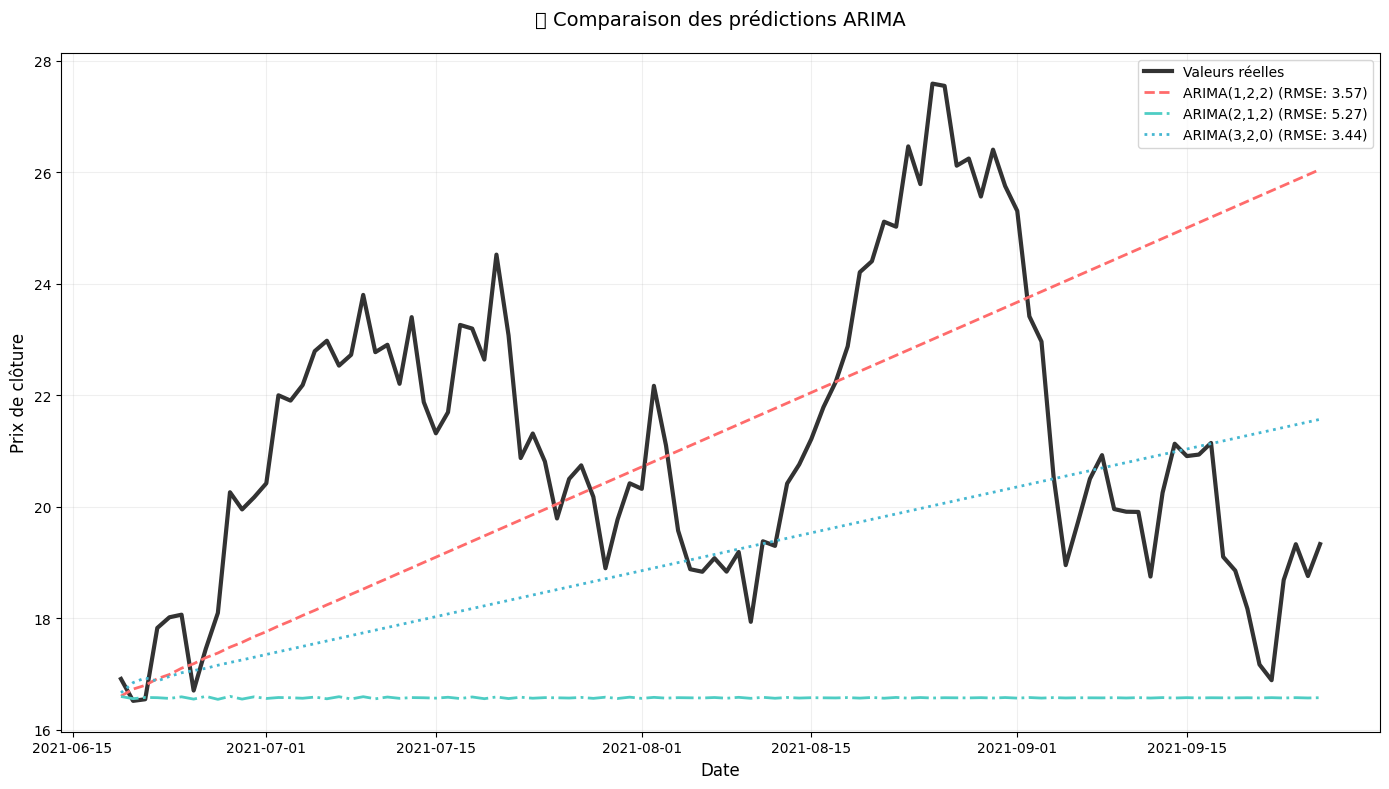

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display
# 1. Pr√©paration des donn√©es (simul√©es si aucune donn√©e r√©elle)
np.random.seed(42)
# Split train-test
train = data.iloc[:-100]
test = data.iloc[-100:]
# 2. Entra√Ænement des mod√®les
models = {
    "ARIMA(1,2,2)": ARIMA(train["Close"], order=(1,2,2)).fit(),
    "ARIMA(2,1,2)": ARIMA(train["Close"], order=(2,1,2)).fit(),
    "ARIMA(3,2,0)": ARIMA(train["Close"], order=(3,2,0)).fit()
}
# 3. √âvaluation et pr√©dictions
results = []
predictions = {}
for name, model in models.items():
    # G√©n√©ration des pr√©dictions
    pred = model.forecast(steps=len(test))
    predictions[name] = pred
    # Calcul des m√©triques
    metrics = {
        "Mod√®le": name,
        "MAE": mean_absolute_error(test["Close"], pred),
        "RMSE": np.sqrt(mean_squared_error(test["Close"], pred)),
        "R¬≤": r2_score(test["Close"], pred),
        "MAPE": np.mean(np.abs((test["Close"] - pred)/test["Close"]))*100
    }
    results.append(metrics)

# 4. Affichage des r√©sultats
results_df = pd.DataFrame(results).set_index("Mod√®le")
print("üìä COMPARAISON DES PERFORMANCES")
display(results_df.style.format({
    "MAE": "{:.2f}",
    "RMSE": "{:.2f}",
    "R¬≤": "{:.4f}",
    "MAPE": "{:.2f}%"
}).background_gradient(cmap="Blues", subset=["RMSE", "MAE"]))

# 5. Visualisation am√©lior√©e
plt.figure(figsize=(14, 8))
plt.plot(test.index, test["Close"], "k-", label="Valeurs r√©elles", linewidth=3, alpha=0.8)

colors = ["#FF6B6B", "#4ECDC4", "#45B7D1"]
linestyles = ["--", "-.", ":"]

for (name, pred), color, ls in zip(predictions.items(), colors, linestyles):
    plt.plot(test.index, pred,
             label=f"{name} (RMSE: {results_df.loc[name, 'RMSE']:.2f})",
             color=color,
             linestyle=ls,
             linewidth=2)

plt.title("üîç Comparaison des pr√©dictions ARIMA", fontsize=14, pad=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Prix de cl√¥ture", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

**Interpretation**

**R√©sum√© de l'Interpr√©tation des Performances des Mod√®les ARIMA**
**Meilleur Mod√®le :**
ARIMA(3,2,0), avec le MAE (2.74) et le RMSE (3.44) les plus bas, et le MAPE (12.25%) le plus faible, ce qui indique qu'il offre les pr√©visions les plus pr√©cises et les erreurs les plus faibles parmi les mod√®les compar√©s.

**Mod√®le Moyen :**
ARIMA(1,2,2), avec un MAE de 2.94 et un RMSE de 3.57, montre des performances correctes mais l√©g√®rement inf√©rieures √† ARIMA(3,2,0). Son MAPE (14.10%) est √©galement plus √©lev√©.

**Pire Mod√®le :**
ARIMA(2,1,2), avec le MAE (4.58) et le RMSE (5.27) les plus √©lev√©s, ainsi que le MAPE (20.50%) le plus important, montre des erreurs de pr√©vision plus grandes, et ne s'ajuste pas aussi bien aux donn√©es.

**Conclusion :**
ARIMA(3,2,0) est le meilleur mod√®le en termes de pr√©cision, avec des erreurs plus faibles. ARIMA(2,1,2) pr√©sente de mauvaises performances et doit √™tre √©vit√©.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Split des Donn√©es**

In [ ]:
data_clean=data.dropna()
train_size = int(len(data_clean) * 0.8)
train = data_clean.iloc[:train_size]
test = data_clean.iloc[train_size:]
features = ['High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']

In [ ]:
data_clean=data.dropna()
train_size = int(len(data_clean) * 0.8)
train = data_clean.iloc[:train_size]
test = data_clean.iloc[train_size:]
# Include 'Volatility' and 'RSI' in the features list
features = ['High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']

In [ ]:
! pip install optuna

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Meilleurs hyperparam√®tres
print("Meilleurs param√®tres:", study.best_params)

[I 2025-04-26 23:09:18,456] A new study created in memory with name: no-name-b115c2b0-9aee-4d16-b037-be29efb1671b
[I 2025-04-26 23:09:18,554] Trial 0 finished with value: 17.2732492051214 and parameters: {'p': 0, 'd': 2, 'q': 0}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:26,663] Trial 1 finished with value: 18.543124607144783 and parameters: {'p': 3, 'd': 0, 'q': 3}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:29,754] Trial 2 finished with value: 21.585074299053293 and parameters: {'p': 2, 'd': 2, 'q': 1}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:34,309] Trial 3 finished with value: 18.44065148105036 and parameters: {'p': 3, 'd': 0, 'q': 1}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:34,516] Trial 4 finished with value: 17.2732492051214 and parameters: {'p': 0, 'd': 2, 'q': 0}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:35,091] Trial 5 finished with value: 18.06939142510

Meilleurs param√®tres: {'p': 3, 'd': 2, 'q': 0}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import optuna

# 1Ô∏è‚É£ Classe personnalis√©e pour la cr√©ation de s√©quences
class SequenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, seq_length=60, target_idx=0):
        self.seq_length = seq_length
        self.target_idx = target_idx

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_seq, y_seq = [], []
        for i in range(len(X) - self.seq_length):
            X_seq.append(X[i:i+self.seq_length])
            y_seq.append(X[i+self.seq_length, self.target_idx])
        return np.array(X_seq), np.array(y_seq)

# 2Ô∏è‚É£ Pipeline complet de pr√©traitement
def create_pipeline(target_idx=0, seq_length=60):
    return Pipeline([
        ('scaler', RobustScaler()),
        ('sequencer', SequenceTransformer(seq_length=seq_length, target_idx=target_idx))
    ])

# 3Ô∏è‚É£ Architecture mod√®le am√©lior√©e (unchanged)
def build_advanced_model(input_shape, model_type='LSTM', units=64, n_layers=2, dropout=0.3):
    model = Sequential()

    if model_type == 'CNN-LSTM':
        model.add(Conv1D(filters=units, kernel_size=3, activation='relu',
                        padding='causal', input_shape=input_shape))
        model.add(MaxPooling1D(2))
        model.add(LSTM(units//2, return_sequences=(n_layers>1)))
    elif model_type == 'BiLSTM':
        model.add(Bidirectional(LSTM(units, return_sequences=(n_layers>1)),
                              input_shape=input_shape))
    else:
        model.add(LSTM(units, return_sequences=(n_layers>1), input_shape=input_shape))

    for _ in range(n_layers - 1):
        model.add(LSTM(units, return_sequences=(_ < n_layers-2)))
        model.add(Dropout(dropout))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    return model

# 4Ô∏è‚É£ Fonction d'optimisation Optuna am√©lior√©e
def objective(trial):
    params = {
        'units': trial.suggest_int('units', 32, 256),
        'n_layers': trial.suggest_int('n_layers', 1, 4),
        'dropout': trial.suggest_float('dropout', 0.1, 0.5),
        'model_type': trial.suggest_categorical('model_type', ['LSTM', 'BiLSTM', 'CNN-LSTM']),
        # 'lr' est utilis√© dans la compilation du mod√®le, pas dans build_advanced_model
        'lr': trial.suggest_float('lr', 1e-5, 1e-3, log=True)
    }

    # Retirer 'lr' de params avant d'appeler build_advanced_model
    lr = params.pop('lr')

    model = build_advanced_model(
        input_shape=(SEQ_LENGTH, X_train.shape[2]),
        **params
    )

    # Compilation du mod√®le avec l'optimiseur et le taux d'apprentissage
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),  # Utilisation de lr ici
        loss=tf.keras.losses.Huber(),
        metrics=['mae']
    )

    # Callbacks adaptatifs
    callbacks = [
        EarlyStopping(patience=15, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5)
    ]

    # Entra√Ænement du mod√®le
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        verbose=0,
        callbacks=callbacks
    )

    return min(history.history['val_mae'])


# ‚ñ∂Ô∏è Workflow principal
if __name__ == "__main__":
    SEQ_LENGTH = 60
    TARGET_COL = 'Close'

    data = pd.read_csv('/content/drive/MyDrive/timeSerie/Final_Bitcoin_dataset.csv', parse_dates=['Date'])
    data.set_index('Date', inplace=True)

    # Feature engineering
    data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100
    data['MACD'] = data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean()

    # D√©terminer l'index de la colonne cible
    target_idx = data.columns.get_loc(TARGET_COL)

    # Cr√©ation du pipeline avec l'index de la cible
    pipeline = create_pipeline(target_idx=target_idx, seq_length=SEQ_LENGTH)
    X_seq, y_seq = pipeline.fit_transform(data)

    # Split temporel
    tscv = TimeSeriesSplit(n_splits=5)
    train_idx, val_idx = next(tscv.split(X_seq))

    X_train, X_val = X_seq[train_idx], X_seq[val_idx]
    y_train, y_val = y_seq[train_idx], y_seq[val_idx]

    # Optimisation Optuna
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Entra√Ænement du mod√®le final
    best_params = study.best_params
    best_lr = best_params.pop('lr')  # Remove 'lr' before passing to build_advanced_model

    final_model = build_advanced_model(
    input_shape=(SEQ_LENGTH, X_train.shape[2]),
    **best_params  # Pass best_params without 'lr'
   )

    final_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),  # Use best_lr here
        loss=tf.keras.losses.Huber(),
        metrics=['mae']
   )

    history = final_model.fit(
        X_seq, y_seq,
        epochs=200,
        batch_size=128,
        validation_split = 0.2,
        callbacks=[EarlyStopping(patience=20)]
    )

    final_model.save('bitcoin_advanced_model.h5')

[I 2025-04-26 23:11:34,370] A new study created in memory with name: no-name-ad0d0b9a-0c77-4b77-85a3-2c296519a64d
[I 2025-04-26 23:11:51,586] Trial 0 finished with value: 0.17767512798309326 and parameters: {'units': 36, 'n_layers': 2, 'dropout': 0.35433779149817846, 'model_type': 'LSTM', 'lr': 0.0008567378044535851}. Best is trial 0 with value: 0.17767512798309326.
[I 2025-04-26 23:13:30,480] Trial 1 finished with value: 0.2762517035007477 and parameters: {'units': 59, 'n_layers': 4, 'dropout': 0.19731952905955313, 'model_type': 'LSTM', 'lr': 1.501227498114947e-05}. Best is trial 0 with value: 0.17767512798309326.
[I 2025-04-26 23:14:15,932] Trial 2 finished with value: 0.3021506071090698 and parameters: {'units': 128, 'n_layers': 3, 'dropout': 0.39385969617791394, 'model_type': 'CNN-LSTM', 'lr': 1.3489092989193127e-05}. Best is trial 0 with value: 0.17767512798309326.
[I 2025-04-26 23:19:10,626] Trial 3 finished with value: 0.17629872262477875 and parameters: {'units': 202, 'n_layers

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import model_from_json

# Charger l'architecture
with open("/content/drive/MyDrive/timeSerie/model_architecture.json", "r") as f:
    final_model = model_from_json(f.read())

# Charger les poids
final_model.load_weights("/content/drive/MyDrive/timeSerie/model_weights.weights.h5")

print("‚úÖ Mod√®le reconstruit avec succ√®s !")

‚úÖ Mod√®le reconstruit avec succ√®s !


In [ ]:
import joblib
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# üîπ Red√©finir la classe personnalis√©e
class SequenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, seq_length=60, target_idx=0):
        self.seq_length = seq_length
        self.target_idx = target_idx

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_seq, y_seq = [], []
        for i in range(len(X) - self.seq_length):
            X_seq.append(X[i:i+self.seq_length])
            y_seq.append(X[i+self.seq_length, self.target_idx])
        return np.array(X_seq), np.array(y_seq)

# üîπ Maintenant, tu peux charger le pipeline
pipeline = joblib.load('/content/drive/MyDrive/timeSerie/preprocessing_pipeline.pkl')

print("‚úÖ Pipeline charg√© avec succ√®s !")

‚úÖ Pipeline charg√© avec succ√®s !


67/67 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 109ms/step

üîç Diagnostic des donn√©es:
NaNs dans y_actual: 0
NaNs dans y_pred: 60
Donn√©es valides conserv√©es: 2073/2133 points


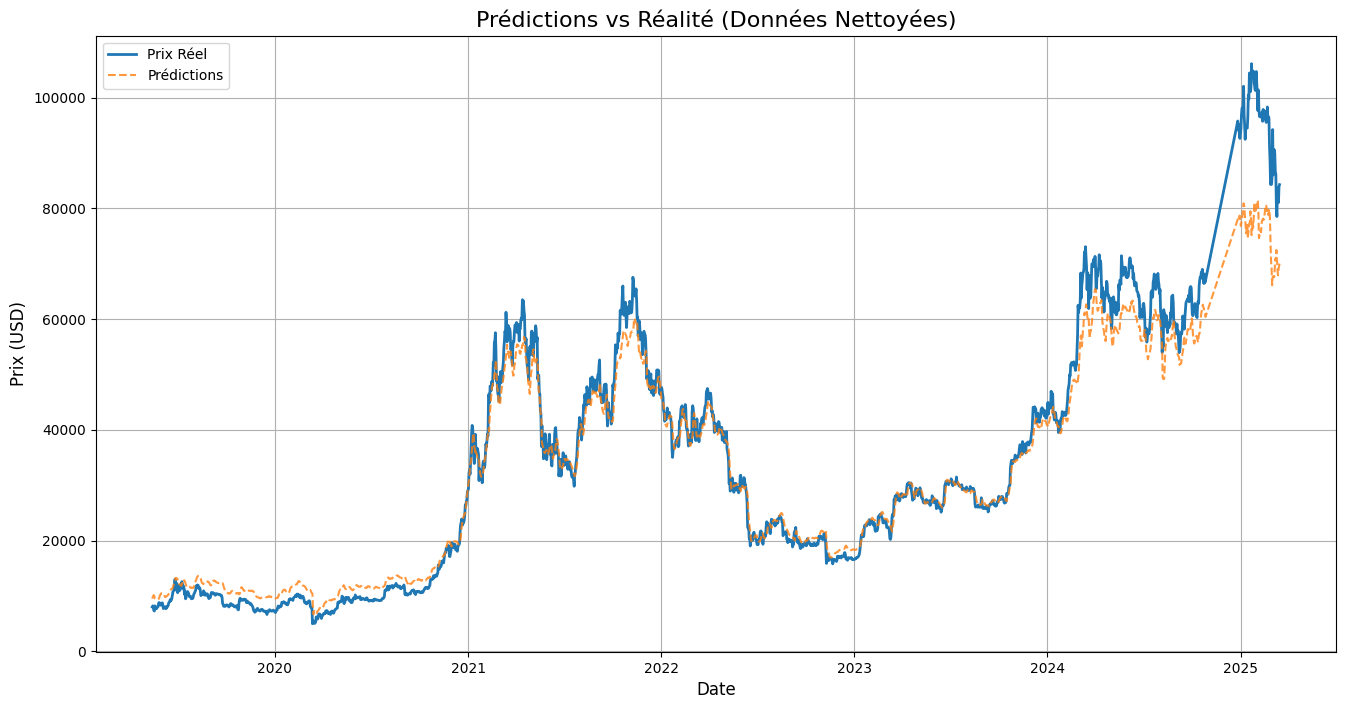


üìä Performance en USD:
MAE: 2875.61
RMSE: 4838.75
R¬≤: 0.9538


In [ ]:
# ... (apr√®s la sauvegarde du mod√®le dans le workflow principal)

    # ‚û§ INVERSE TRANSFORM DES DONN√âES
     # R√©cup√©ration du scaler depuis le pipeline
scaler = pipeline.named_steps['scaler']
n_features = data.shape[1]  # Nombre de features original
target_idx = data.columns.get_loc(TARGET_COL)

    # Cr√©ation de matrices dummy pour l'inverse scaling
def inverse_scale(y_values):
    dummy = np.zeros((len(y_values), n_features))
    dummy[:, target_idx] = y_values.ravel()
    return scaler.inverse_transform(dummy)[:, target_idx]

    # Application aux donn√©es
y_actual = inverse_scale(y_seq)
y_pred = inverse_scale(final_model.predict(X_seq).flatten())

    # 1. V√©rification des NaN
print("\nüîç Diagnostic des donn√©es:")
print(f"NaNs dans y_actual: {np.isnan(y_actual).sum()}")
print(f"NaNs dans y_pred: {np.isnan(y_pred).sum()}")

    # 2. Cr√©ation du masque de filtrage
mask = ~np.isnan(y_actual) & ~np.isnan(y_pred)

    # 3. Filtrage des donn√©es
y_actual_clean = y_actual[mask]
y_pred_clean = y_pred[mask]
dates_clean = data.index[SEQ_LENGTH:][mask]

    # 4. Validation finale
assert len(y_actual_clean) > 0, "Erreur critique: Aucune donn√©e valide apr√®s nettoyage!"
print(f"Donn√©es valides conserv√©es: {len(y_actual_clean)}/{len(y_actual)} points")

    # ‚û§ VISUALISATION (MODIFI√âE AVEC DONN√âES NETTOY√âES)
plt.figure(figsize=(16, 8))
plt.plot(dates_clean, y_actual_clean, label='Prix R√©el', linewidth=2)
plt.plot(dates_clean, y_pred_clean, label='Pr√©dictions', linestyle='--', alpha=0.8)
plt.title('Pr√©dictions vs R√©alit√© (Donn√©es Nettoy√©es)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

    # ‚û§ M√âTRIQUES (AVEC DONN√âES NETTOY√âES)
print("\n\033[1müìä Performance en USD:\033[0m")
print(f"MAE: {mean_absolute_error(y_actual_clean, y_pred_clean):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_actual_clean, y_pred_clean)):.2f}")
print(f"R¬≤: {r2_score(y_actual_clean, y_pred_clean):.4f}")

In [ ]:
!pip install shap --upgrade
!pip install tensorflow --upgrade

**R√©sum√© du Code : Chargement des donn√©es :**

Les donn√©es sont charg√©es, et si elles contiennent des colonnes de type datetime, elles sont converties en format timestamp (secondes depuis l'epoch).

**Gestion des valeurs manquantes :**

Le code v√©rifie s'il y a des valeurs manquantes (NaN) dans les donn√©es.

Les valeurs manquantes sont soit remplac√©es par la moyenne de chaque colonne, soit les lignes contenant des NaN sont supprim√©es.

**Pr√©paration des donn√©es :**

Les donn√©es sont pr√©par√©es pour la cr√©ation d'un mod√®le GRU, o√π une fen√™tre glissante de 10 valeurs est utilis√©e pour g√©n√©rer les donn√©es d'entr√©e (X) et la cible (y).

Une v√©rification est effectu√©e pour s'assurer qu'il n'y a pas de NaN dans X et y, et les NaN restants sont remplac√©s par la moyenne de chaque colonne.

**Entra√Ænement du mod√®le GRU :**

Le mod√®le GRU est optimis√© avec Optuna pour rechercher les meilleurs hyperparam√®tres (nombre d'unit√©s et taux d'apprentissage).

Le mod√®le est ensuite entra√Æn√© avec les meilleurs hyperparam√®tres, et les pr√©dictions sont g√©n√©r√©es.

**Comparaison avec un mod√®le final (si d√©fini) :**

le mod√®le final_model d√©j√† charg√©, ses performances sont compar√©es avec celles du mod√®le GRU en calculant l'erreur quadratique moyenne (MSE).

Le meilleur des deux mod√®les est s√©lectionn√© en fonction de leur MSE.

**Sauvegarde du meilleur mod√®le :**

Si le mod√®le GRU a un MSE inf√©rieur √† celui du final_model, le mod√®le GRU est sauvegard√©.

Si le final_model est meilleur, c'est ce mod√®le qui est sauvegard√©.

Si un mod√®le combin√© (moyenne des pr√©dictions des deux mod√®les) donne de meilleures performances, ce mod√®le combin√© est sauvegard√©.

**R√©sultats :** Un seul mod√®le est sauvegard√© √† la fin : soit le mod√®le GRU, soit le mod√®le final_model, soit un mod√®le combin√© des deux, selon les performances.

Si final_model n'est pas d√©fini, seul le mod√®le GRU sera sauvegard√©.

Les mod√®les sont sauvegard√©s sous le nom "best_model_final_and_gru.h5" ou, si combin√©s, sous "combined_model_final_gru.pkl".


[ ]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib

# 1. === CHARGER LES DONN√âES ===
data = pd.read_csv('/content/drive/MyDrive/timeSerie/Final_Bitcoin_dataset.csv')

# 1.1 Convertir la colonne "Date" si elle existe
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # G√®re les erreurs de format
    data['Date'] = data['Date'].astype(np.int64) / 10**9  # Convertir en timestamp (en secondes)

# 2. === GESTION DES VALEURS MANQUANTES (NaN) ===
print("üîç V√©rification des NaN dans les donn√©es :")
print(data.isnull().sum())

# Remplir les NaN des colonnes num√©riques uniquement
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

# 3. === PR√âPARATION DES DONN√âES ===
SEQ_LENGTH = 10  # Longueur de la s√©quence
features = data.columns.tolist()

# Cr√©er X et y avec des fen√™tres glissantes
X = np.array([data.values[i:i+SEQ_LENGTH] for i in range(len(data) - SEQ_LENGTH)])
y = np.array([data.values[i+SEQ_LENGTH][0] for i in range(len(data) - SEQ_LENGTH)])  # pr√©dire la premi√®re colonne

# V√©rifier et remplacer d'√©ventuels NaN restants
print("üîç V√©rification des NaN dans X :", np.isnan(X).sum())
print("üîç V√©rification des NaN dans y :", np.isnan(y).sum())

X = np.nan_to_num(X, nan=np.nanmean(X))
y = np.nan_to_num(y, nan=np.nanmean(y))

# S√©paration entra√Ænement/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. === CALLBACK EARLY STOPPING ===
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# 5. === OPTIMISATION DU MOD√àLE GRU AVEC OPTUNA ===
def build_and_train_gru(trial):
    model = Sequential()
    model.add(GRU(
        units=trial.suggest_int("units", 32, 128),
        activation="tanh",
        return_sequences=False,
        input_shape=(SEQ_LENGTH, X_train.shape[2])
    ))
    model.add(Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=trial.suggest_float("lr", 1e-4, 1e-2, log=True)),
        loss="mse"
    )
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )
    preds = model.predict(X_val)
    return mean_squared_error(y_val, preds)

# Lancer Optuna
study = optuna.create_study(direction="minimize")
study.optimize(build_and_train_gru, n_trials=10)

# 6. === ENTRA√éNEMENT FINAL AVEC LES MEILLEURS PARAM√àTRES ===
best_params = study.best_params

gru_model = Sequential()
gru_model.add(GRU(
    units=best_params["units"],
    activation="tanh",
    return_sequences=False,
    input_shape=(SEQ_LENGTH, X_train.shape[2])
))
gru_model.add(Dense(1))
gru_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params["lr"]),
    loss="mse"
)
gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)
preds_gru = gru_model.predict(X_val)
mse_gru = mean_squared_error(y_val, preds_gru)

# 7. === SUPPOSONS QUE TU AS UN AUTRE MOD√àLE "final_model" ===
# ‚ö†Ô∏è Assure-toi que final_model existe dans ton code !
# Sinon, tu dois entra√Æner un autre mod√®le ici ou commenter cette partie

try:
    preds_final = final_model.predict(X_val)
    mse_final = mean_squared_error(y_val, preds_final)

    # Choisir le meilleur mod√®le
    if mse_gru < mse_final:
        best_model = gru_model
    else:
        best_model = final_model
except:
    print("‚ö†Ô∏è Aucun mod√®le 'final_model' d√©tect√©. Le mod√®le GRU sera utilis√© seul.")
    best_model = gru_model
    mse_final = np.inf
    preds_final = np.zeros_like(preds_gru)

# 8. === SAUVEGARDE DU MEILLEUR MOD√àLE ===
best_model.save("best_model_final_and_gru.h5")

# 9. === COMBINAISON DES PR√âDICTIONS (si possible) ===
combined_preds = (preds_gru + preds_final) / 2
mse_combined = mean_squared_error(y_val, combined_preds)

# 10. === SAUVEGARDE DU MOD√àLE COMBIN√â SI MEILLEUR ===
if mse_combined < min(mse_gru, mse_final):
    print("‚úÖ Le mod√®le combin√© est le meilleur.")
    joblib.dump((final_model, gru_model), "combined_model_final_gru.pkl")
else:
    print("‚úÖ Le meilleur mod√®le est d√©j√† sauvegard√© sous best_model_final_and_gru.h5")


üîç V√©rification des NaN dans les donn√©es :
Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
fear_greed    1
dtype: int64


[I 2025-04-07 18:04:28,004] A new study created in memory with name: no-name-4bb872e6-06df-4a4a-b833-514231fb3046


üîç V√©rification des NaN dans X : 0
üîç V√©rification des NaN dans y : 0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step


[I 2025-04-07 18:04:56,143] Trial 0 finished with value: 2.969404692390022e+18 and parameters: {'units': 77, 'lr': 0.00035260695028413837}. Best is trial 0 with value: 2.969404692390022e+18.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step


[I 2025-04-07 18:05:52,503] Trial 1 finished with value: 2.969401812823618e+18 and parameters: {'units': 106, 'lr': 0.002882286282785679}. Best is trial 1 with value: 2.969401812823618e+18.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step


[I 2025-04-07 18:06:46,228] Trial 2 finished with value: 2.9694027018947036e+18 and parameters: {'units': 95, 'lr': 0.0024698366546718623}. Best is trial 1 with value: 2.969401812823618e+18.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Conclusion :**Ce code permet d'entra√Æner un mod√®le GRU optimis√©, de le comparer avec un autre mod√®le (final_model), et de sauvegarder le meilleur mod√®le, qu'il soit GRU, final_model, ou une combinaison des deux.

prevision

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# 1. Charger les donn√©es
data = pd.read_csv('/content/drive/MyDrive/timeSerie/Final_Bitcoin_dataset.csv')
data = data.sort_index()

# ‚ö†Ô∏è Supprimer les lignes contenant des NaN
data = data.dropna()

# 2. Garder uniquement les colonnes num√©riques
numeric_data = data.select_dtypes(include=[np.number])

# 3. D√©finir les features (sauf 'Close') et la cible
target_col = 'Close'
feature_cols = [col for col in numeric_data.columns if col != target_col]

# 4. Normaliser
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(numeric_data[feature_cols])
y_scaled = scaler_y.fit_transform(numeric_data[[target_col]])

# 5. Cr√©er les s√©quences pour le mod√®le (SEQ_LENGTH = 60)
SEQ_LENGTH = 60
X = np.array([X_scaled[i:i+SEQ_LENGTH] for i in range(len(X_scaled) - SEQ_LENGTH)])
y = np.array([y_scaled[i+SEQ_LENGTH] for i in range(len(y_scaled) - SEQ_LENGTH)])

# 6. S√©parer en jeu d'entra√Ænement et de test
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# 7. Charger le mod√®le GRU
try:
    model = tf.keras.models.load_model('/content/best_model_final_and_gru.h5')
    print("Mod√®le charg√© avec succ√®s !")
except Exception as e:
    print(f"Erreur lors du chargement du mod√®le : {e}")
    exit()

# 8. Pr√©dictions
predictions_scaled = model.predict(X_val)
predictions = scaler_y.inverse_transform(predictions_scaled)
y_val_inv = scaler_y.inverse_transform(y_val)

# 9. Erreurs
mse = mean_squared_error(y_val_inv, predictions)
mae = mean_absolute_error(y_val_inv, predictions)
rmse = sqrt(mse)

# 10. üìà Courbe : R√©el vs Pr√©dit
plt.figure(figsize=(14, 6))
plt.plot(y_val_inv, label='Valeurs r√©elles (Close)', color='blue')
plt.plot(predictions, label='Pr√©dictions (Close)', color='red')
plt.title('Comparaison : Valeurs r√©elles vs Pr√©dictions')
plt.xlabel('Temps')
plt.ylabel('Prix Bitcoin')
plt.legend()
plt.grid(True)
plt.show()

# 11. üìâ Erreur (valeurs r√©elles - pr√©dictions)
plt.figure(figsize=(14, 5))
plt.plot(y_val_inv.flatten() - predictions.flatten(), label='Erreur (R√©el - Pr√©dit)', color='green')
plt.title("Erreur entre les valeurs r√©elles et pr√©dites")
plt.xlabel("Temps")
plt.ylabel("Erreur")
plt.legend()
plt.grid(True)
plt.show()

# 12. üî¢ Affichage des m√©triques
print("üìä √âvaluation du mod√®le :")
print(f"‚úîÔ∏è MSE  : {mse:.4f}")
print(f"‚úîÔ∏è MAE  : {mae:.4f}")
print(f"‚úîÔ∏è RMSE : {rmse:.4f}")

# V√©rifications des dimensions
print(f"Dimensions de y_val_inv : {y_val_inv.shape}")
print(f"Dimensions des pr√©dictions : {predictions.shape}")